# Udacity Citizen Data Scientist Nanodegree #

**Author**:  Erik Sokolovsky \
**Date**:  September 2022 \
**Public Github repo:** https://github.com/falk05/udacity_cds_crispdm.git

# Section 1:  Business Understanding #
We analyse data gathered from charging stations for electric vehicles installed in a multi-space private parking garage.  The intention is to see what insights can be gained from the charging behaviour of the different EV owners.
## Question 1: What can we infer from the charging patterns observed to date? ##
## Question 2: What cost savings could EV owners achieve without changing their vehicle usage pattern? ##
## Question 3: Can we forecast hourly energy demand from historical charging data and meteorological data? ##

In [1]:
import json
import datetime as dt
from os import read
import pandas as pd
import numpy as np
from pandas.io import html
import csv


# Section 2:  Data Understanding ##
## Gathering charging data ##
The data used for this project is gathered from the API provided by Zaptec, a Norwegian manufacturer of electric vehicle charging infrastructure.  Prior to feeding the data into this Jupyter Notebook, it is anonymized using a separate Python script provided in this project.  For further details, see the README.MD contained in the Github project at https://github.com/falk05/udacity_cds_crispdm


In [2]:
file = 'response_anon.json'

In [3]:
with open (file) as f:
    d = json.load (f)

In [4]:
sessions_df = pd.json_normalize (d['Data'])

In [5]:
sessions_df

,Id,DeviceId,StartDateTime,EndDateTime,Energy,CommitMetadata,CommitEndDateTime,ChargerId,ExternallyEnded,SignedSession,EnergyDetails,UserId
0,39319a82-0ef4-4d3e-b698-705a005ddca2,ZPR072245,2021-10-04T09:33:01.503,2021-10-04T09:45:29.683,0.000,6,2021-10-04T09:45:20.53,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",NaN,NaN
1,a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04T09:45:33.467,2021-10-04T09:46:42.61,0.000,5,2021-10-04T09:46:42.61,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:45:30.596+00:00'...,NaN
2,d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04T09:49:09.793,2021-10-04T09:50:10.007,0.000,5,2021-10-04T09:50:10.007,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:49:08.904+00:00'...,NaN
3,5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04T09:53:43.023,2021-10-04T09:55:15.45,0.000,5,2021-10-04T09:55:15.45,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:53:42.364+00:00'...,NaN
4,4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04T09:59:59.13,2021-10-04T10:01:32.343,0.000,5,2021-10-04T10:01:32.343,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...","[{'Timestamp': '2021-10-04T09:59:58.44+00:00',...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
430,9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12T17:31:57.963,2022-09-12T17:45:14.89,0.000,5,2022-09-12T17:45:14.89,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T17:31:57.949+00:00'...,NaN
431,1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12T18:16:35.94,2022-09-14T06:15:03.08,8.445,5,2022-09-14T06:15:03.08,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T18:16:35.927+00:00'...,NaN
432,1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16T14:59:56.457,2022-09-16T16:59:34.75,22.395,5,2022-09-16T16:59:34.75,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-16T14:59:56.446+00:00'...,5a592b37-beb2-48e2-8be8-b5d7e46c6a5f
433,186f2a5f-fef5-4cf9-a578-139e6c21167d,ZPR072254,2022-09-16T18:21:54.183,2022-09-17T05:28:02.773,38.728,5,2022-09-17T05:28:02.773,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-16T18:21:54.173+00:00'...,NaN


## Gathering meteorological data ##
Read the meterological data used later for generation of the energy prediction model. <br>

**Source** <br>
The meteorological data used here is sourced from the `opendata.swiss` website.<br>
The hourly dataset for the city of Zurich, Switzerland, can be downloaded from: <br>
https://opendata.swiss/de/dataset/stundlich-aktualisierte-meteodaten-seit-1992

In [6]:
file = 'ugz_ogd_meteo_h1_2021.csv'

In [7]:
with open (file) as f:
    d = pd.read_csv (f)

In [8]:
d

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.35,provisorisch
1,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,Hr,h1,%Hr,87.68,provisorisch
2,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,953.89,provisorisch
3,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,RainDur,h1,min,0.00,provisorisch
4,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,h1,W/m2,0.02,provisorisch
...,...,...,...,...,...,...,...
192671,2021-12-31T21:00+0100,Zch_Rosengartenstrasse,p,h1,hPa,976.66,provisorisch
192672,2021-12-31T21:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.00,provisorisch
192673,2021-12-31T21:00+0100,Zch_Rosengartenstrasse,WD,h1,°,44.82,provisorisch
192674,2021-12-31T21:00+0100,Zch_Rosengartenstrasse,WVv,h1,m/s,0.08,provisorisch


In [9]:
file = 'ugz_ogd_meteo_h1_2022.csv'

In [10]:
with open (file) as f:
    e = pd.read_csv (f)

In [11]:
e

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2022-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,7.22,provisorisch
1,2022-01-01T00:00+0100,Zch_Stampfenbachstrasse,Hr,h1,%Hr,82.93,provisorisch
2,2022-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,977.20,provisorisch
3,2022-01-01T00:00+0100,Zch_Stampfenbachstrasse,RainDur,h1,min,0.00,provisorisch
4,2022-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,h1,W/m2,0.02,provisorisch
...,...,...,...,...,...,...,...
136461,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,p,h1,hPa,961.16,provisorisch
136462,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.38,provisorisch
136463,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,WD,h1,°,216.53,provisorisch
136464,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,WVv,h1,m/s,0.37,provisorisch


In [12]:
meteo_df = pd.concat([d, e], ignore_index=True)

In [13]:
meteo_df

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.35,provisorisch
1,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,Hr,h1,%Hr,87.68,provisorisch
2,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,953.89,provisorisch
3,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,RainDur,h1,min,0.00,provisorisch
4,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,h1,W/m2,0.02,provisorisch
...,...,...,...,...,...,...,...
329137,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,p,h1,hPa,961.16,provisorisch
329138,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.38,provisorisch
329139,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,WD,h1,°,216.53,provisorisch
329140,2022-09-16T10:00+0100,Zch_Rosengartenstrasse,WVv,h1,m/s,0.37,provisorisch


# Section 3:  Data Preparation #
We prepare two dataframes for the charging data:
- `sessions_df` contains one row per EV charging session
- `energy_details_df` contains one row for each kWh readout during every charging session

**Data Structure**: <br>
One row in `sessions_df` has many related rows in `energy_details_df`

\
First, we remove the sessions where energy details are missing.

In [14]:
sessions_df['EnergyDetails'].isna().sum()

2

In [15]:
# Drop rows there energy details is missing
sessions_df = sessions_df[sessions_df['EnergyDetails'].notna()]

\
\
We prepare the **energy details dataframe**.


In [16]:
# Prepare the energy details dataframe
e_df = sessions_df[['Id', 'EnergyDetails', 'DeviceId']]

In [17]:
e_df

,Id,EnergyDetails,DeviceId
1,a4802b64-7314-4c74-bcac-5ef9badfd05c,[{'Timestamp': '2021-10-04T09:45:30.596+00:00'...,ZPR072245
2,d1b1ebff-6e4a-4593-86fe-6256eb8c2815,[{'Timestamp': '2021-10-04T09:49:08.904+00:00'...,ZPR072245
3,5076b893-cfe3-4b18-bf08-5300448e6716,[{'Timestamp': '2021-10-04T09:53:42.364+00:00'...,ZPR072245
4,4ffa3a72-42d7-4898-b39a-9b815dc52505,"[{'Timestamp': '2021-10-04T09:59:58.44+00:00',...",ZPR072254
5,e724a071-b454-4dd6-af48-e691f4da3b82,[{'Timestamp': '2021-10-04T19:51:41.716+00:00'...,ZPR072245
...,...,...,...
430,9daf8621-97d7-4535-8a6e-57cd856d48d5,[{'Timestamp': '2022-09-12T17:31:57.949+00:00'...,ZPR072254
431,1618ab91-26a8-403c-bcb6-06394a2b1a87,[{'Timestamp': '2022-09-12T18:16:35.927+00:00'...,ZPR072254
432,1b2e9bb4-6978-41c5-a13e-09ffccf58f83,[{'Timestamp': '2022-09-16T14:59:56.446+00:00'...,ZPR072245
433,186f2a5f-fef5-4cf9-a578-139e6c21167d,[{'Timestamp': '2022-09-16T18:21:54.173+00:00'...,ZPR072254


In [18]:
# Confirm that Session IDs are indeed unique
assert e_df['Id'].is_unique == True

In [19]:
# Unpack the list of dicts in EnergyDetails, create one row per dict
e_df_2 = e_df.explode('EnergyDetails')

In [20]:
e_df_2.rename (columns={'Id': 'SessionID'}, inplace=True)
e_df_2 = e_df_2.set_index(['SessionID', 'DeviceId'])

In [21]:
e_df_2

EnergyDetails
SessionID                            DeviceId                                                    
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245  {'Timestamp': '2021-10-04T09:45:30.596+00:00',...
                                     ZPR072245  {'Timestamp': '2021-10-04T09:46:42.536+00:00',...
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245  {'Timestamp': '2021-10-04T09:49:08.904+00:00',...
                                     ZPR072245  {'Timestamp': '2021-10-04T09:50:09.93+00:00', ...
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245  {'Timestamp': '2021-10-04T09:53:42.364+00:00',...
...                                                                                           ...
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254  {'Timestamp': '2022-09-18T11:45:00.178+00:00',...
                                     ZPR072254  {'Timestamp': '2022-09-18T12:00:00.055+00:00',...
                                     ZPR072254  {'Timestamp': '2022-09-18T12:15:00.996+00:00',...
                                     ZPR072254  {'Timestamp': '2022-09-18T12:30:00.474+00:00',...
                                     ZPR072254  {'Timestamp': '2022-09-18T12:33:56.594+00:00',...

[4714 rows x 1 columns]

In [22]:
# Turn the EnergyDetails dict into columns
e_df_3 = e_df_2['EnergyDetails'].apply(pd.Series)

In [23]:
e_df_3

Timestamp  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245  2021-10-04T09:45:30.596+00:00   
                                     ZPR072245  2021-10-04T09:46:42.536+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245  2021-10-04T09:49:08.904+00:00   
                                     ZPR072245   2021-10-04T09:50:09.93+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245  2021-10-04T09:53:42.364+00:00   
...                                                                       ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254  2022-09-18T11:45:00.178+00:00   
                                     ZPR072254  2022-09-18T12:00:00.055+00:00   
                                     ZPR072254  2022-09-18T12:15:00.996+00:00   
                                     ZPR072254  2022-09-18T12:30:00.474+00:00   
                                     ZPR072254  2022-09-18T12:33:56.594+00:00   

                                                Energy  
SessionID                            DeviceId           
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000  
                                     ZPR072245   0.000  
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000  
                                     ZPR072245   0.000  
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000  
...                                                ...  
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141  
                                     ZPR072254   2.137  
                                     ZPR072254   2.138  
                                     ZPR072254   2.138  
                                     ZPR072254   0.554  

[4714 rows x 2 columns]

In [24]:
energy_details_df = e_df_3[['Energy', 'Timestamp']]

In [25]:
# Final dataframe
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                    Timestamp  
SessionID                            DeviceId                                  
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245  2021-10-04T09:45:30.596+00:00  
                                     ZPR072245  2021-10-04T09:46:42.536+00:00  
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245  2021-10-04T09:49:08.904+00:00  
                                     ZPR072245   2021-10-04T09:50:09.93+00:00  
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245  2021-10-04T09:53:42.364+00:00  
...                                                                       ...  
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254  2022-09-18T11:45:00.178+00:00  
                                     ZPR072254  2022-09-18T12:00:00.055+00:00  
                                     ZPR072254  2022-09-18T12:15:00.996+00:00  
                                     ZPR072254  2022-09-18T12:30:00.474+00:00  
                                     ZPR072254  2022-09-18T12:33:56.594+00:00  

[4714 rows x 2 columns]

**Data cleaning**\
Split up the Timestamp in Energy Details for easier grouping later.

In [26]:
energy_details_df['Hour'] = pd.DatetimeIndex(energy_details_df['Timestamp']).hour

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/3483762375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Hour'] = pd.DatetimeIndex(energy_details_df['Timestamp']).hour


In [27]:
energy_details_df['Minute'] = pd.DatetimeIndex(energy_details_df['Timestamp']).minute

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/2764414312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Minute'] = pd.DatetimeIndex(energy_details_df['Timestamp']).minute


In [28]:
energy_details_df['Second'] = pd.DatetimeIndex(energy_details_df['Timestamp']).second

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/797291181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Second'] = pd.DatetimeIndex(energy_details_df['Timestamp']).second


In [29]:
energy_details_df['Microsecond'] = pd.DatetimeIndex(energy_details_df['Timestamp']).microsecond

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/1138207938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Microsecond'] = pd.DatetimeIndex(energy_details_df['Timestamp']).microsecond


In [30]:
energy_details_df['Year'] = pd.DatetimeIndex(energy_details_df['Timestamp']).year

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/1753067501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Year'] = pd.DatetimeIndex(energy_details_df['Timestamp']).year


In [31]:
energy_details_df['Month'] = pd.DatetimeIndex(energy_details_df['Timestamp']).month

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/401042653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Month'] = pd.DatetimeIndex(energy_details_df['Timestamp']).month


In [32]:
energy_details_df['Day'] = pd.DatetimeIndex(energy_details_df['Timestamp']).day

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/2800583618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Day'] = pd.DatetimeIndex(energy_details_df['Timestamp']).day


In [33]:
energy_details_df['Dayofweek'] = pd.DatetimeIndex(energy_details_df['Timestamp']).dayofweek

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/2308395775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_details_df['Dayofweek'] = pd.DatetimeIndex(energy_details_df['Timestamp']).dayofweek


In [34]:
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                    Timestamp  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245  2021-10-04T09:45:30.596+00:00   
                                     ZPR072245  2021-10-04T09:46:42.536+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245  2021-10-04T09:49:08.904+00:00   
                                     ZPR072245   2021-10-04T09:50:09.93+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245  2021-10-04T09:53:42.364+00:00   
...                                                                       ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254  2022-09-18T11:45:00.178+00:00   
                                     ZPR072254  2022-09-18T12:00:00.055+00:00   
                                     ZPR072254  2022-09-18T12:15:00.996+00:00   
                                     ZPR072254  2022-09-18T12:30:00.474+00:00   
                                     ZPR072254  2022-09-18T12:33:56.594+00:00   

                                                Hour  Minute  Second  \
SessionID                            DeviceId                          
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245     9      45      30   
                                     ZPR072245     9      46      42   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245     9      49       8   
                                     ZPR072245     9      50       9   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245     9      53      42   
...                                              ...     ...     ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254    11      45       0   
                                     ZPR072254    12       0       0   
                                     ZPR072254    12      15       0   
                                     ZPR072254    12      30       0   
                                     ZPR072254    12      33      56   

                                                Microsecond  Year  Month  Day  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245       596000  2021     10    4   
                                     ZPR072245       536000  2021     10    4   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245       904000  2021     10    4   
                                     ZPR072245       930000  2021     10    4   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245       364000  2021     10    4   
...                                                     ...   ...    ...  ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254       178000  2022      9   18   
                                     ZPR072254        55000  2022      9   18   
                                     ZPR072254       996000  2022      9   18   
                                     ZPR072254       474000  2022      9   18   
                                     ZPR072254       594000  2022      9   18   

                                                Dayofweek  
SessionID                            DeviceId              
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245          0  
                                     ZPR072245          0  
d1b1ebff

In [35]:
# Remove rows that contain NaN values for timestamp
energy_details_df = energy_details_df.dropna()

In [36]:
energy_details_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4714 entries, ('a4802b64-7314-4c74-bcac-5ef9badfd05c', 'ZPR072245') to ('560f32fb-aec0-43a0-88db-9171dc7667b9', 'ZPR072254')
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Energy       4714 non-null   float64
 1   Timestamp    4714 non-null   object 
 2   Hour         4714 non-null   int64  
 3   Minute       4714 non-null   int64  
 4   Second       4714 non-null   int64  
 5   Microsecond  4714 non-null   int64  
 6   Year         4714 non-null   int64  
 7   Month        4714 non-null   int64  
 8   Day          4714 non-null   int64  
 9   Dayofweek    4714 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 401.9+ KB


\
\
Now we prepare the **sessions details dataframe**.

In [37]:
# Prepare the sessions dataframe
sessions_df.rename (columns={'Id': 'SessionID'}, inplace=True)
sessions_df = sessions_df.set_index(['SessionID'])

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/481959147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_df.rename (columns={'Id': 'SessionID'}, inplace=True)


In [38]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,CommitMetadata,CommitEndDateTime,ChargerId,ExternallyEnded,SignedSession,EnergyDetails,UserId
SessionID,,,,,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04T09:45:33.467,2021-10-04T09:46:42.61,0.000,5,2021-10-04T09:46:42.61,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:45:30.596+00:00'...,NaN
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04T09:49:09.793,2021-10-04T09:50:10.007,0.000,5,2021-10-04T09:50:10.007,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:49:08.904+00:00'...,NaN
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04T09:53:43.023,2021-10-04T09:55:15.45,0.000,5,2021-10-04T09:55:15.45,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:53:42.364+00:00'...,NaN
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04T09:59:59.13,2021-10-04T10:01:32.343,0.000,5,2021-10-04T10:01:32.343,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...","[{'Timestamp': '2021-10-04T09:59:58.44+00:00',...",NaN
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04T19:51:41.727,2021-10-04T19:53:00.12,0.178,5,2021-10-04T19:53:00.12,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T19:51:41.716+00:00'...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12T17:31:57.963,2022-09-12T17:45:14.89,0.000,5,2022-09-12T17:45:14.89,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T17:31:57.949+00:00'...,NaN
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12T18:16:35.94,2022-09-14T06:15:03.08,8.445,5,2022-09-14T06:15:03.08,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T18:16:35.927+00:00'...,NaN
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16T14:59:56.457,2022-09-16T16:59:34.75,22.395,5,2022-09-16T16:59:34.75,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-16T14:59:56.446+00:00'...,5a592b37-beb2-48e2-8be8-b5d7e46c6a5f


**Cleaning data**
Remove NaN values from sessions_df dataframe.

In [39]:
# sessions_df = sessions_df.dropna()

In [40]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,CommitMetadata,CommitEndDateTime,ChargerId,ExternallyEnded,SignedSession,EnergyDetails,UserId
SessionID,,,,,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04T09:45:33.467,2021-10-04T09:46:42.61,0.000,5,2021-10-04T09:46:42.61,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:45:30.596+00:00'...,NaN
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04T09:49:09.793,2021-10-04T09:50:10.007,0.000,5,2021-10-04T09:50:10.007,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:49:08.904+00:00'...,NaN
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04T09:53:43.023,2021-10-04T09:55:15.45,0.000,5,2021-10-04T09:55:15.45,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:53:42.364+00:00'...,NaN
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04T09:59:59.13,2021-10-04T10:01:32.343,0.000,5,2021-10-04T10:01:32.343,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...","[{'Timestamp': '2021-10-04T09:59:58.44+00:00',...",NaN
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04T19:51:41.727,2021-10-04T19:53:00.12,0.178,5,2021-10-04T19:53:00.12,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T19:51:41.716+00:00'...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12T17:31:57.963,2022-09-12T17:45:14.89,0.000,5,2022-09-12T17:45:14.89,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T17:31:57.949+00:00'...,NaN
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12T18:16:35.94,2022-09-14T06:15:03.08,8.445,5,2022-09-14T06:15:03.08,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T18:16:35.927+00:00'...,NaN
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16T14:59:56.457,2022-09-16T16:59:34.75,22.395,5,2022-09-16T16:59:34.75,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-16T14:59:56.446+00:00'...,5a592b37-beb2-48e2-8be8-b5d7e46c6a5f



### Assessing charging data ###


**Test that energy sum is valid**

We test the integrity of the data by asserting that the amount of energy per session listed in sessions_df is indeed equivalent to the sum of energy readouts listed in energy_details_df

In [41]:
energy_sum = energy_details_df['Energy'].groupby('SessionID').sum()

In [42]:
energy_sum = energy_sum.to_frame()

In [43]:
energy_sum

,Energy
SessionID,
012b1eec-3419-4ef4-a3ff-de325807be31,0.290
019e3ecc-2766-4bf1-811e-6b95e6bf0e42,3.737
02f31d74-16ad-47b2-a261-a5c31f23b72d,0.011
04744039-b339-482e-91f9-7916b1d5b4b1,0.000
0494dab7-11f8-430c-9e88-eec57a73c565,0.000
...,...
fc295b04-e126-4585-98ca-2af496eca49f,4.564
fd76f053-d4df-4728-b4b4-e16273a5ba7a,47.312
fdbc5f38-cb5f-4158-8cf4-340de871adfa,2.228


In [44]:
# Turn Timestamp column into datetime format
energy_details_df['Timestamp'] = pd.to_datetime(energy_details_df['Timestamp'])

In [45]:
sessions_df = sessions_df.join(energy_sum, rsuffix='_s')

In [46]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, a4802b64-7314-4c74-bcac-5ef9badfd05c to 560f32fb-aec0-43a0-88db-9171dc7667b9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DeviceId           433 non-null    object 
 1   StartDateTime      433 non-null    object 
 2   EndDateTime        433 non-null    object 
 3   Energy             433 non-null    float64
 4   CommitMetadata     433 non-null    int64  
 5   CommitEndDateTime  433 non-null    object 
 6   ChargerId          433 non-null    object 
 7   ExternallyEnded    433 non-null    bool   
 8   SignedSession      433 non-null    object 
 9   EnergyDetails      433 non-null    object 
 10  UserId             149 non-null    object 
 11  Energy_s           433 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 57.2+ KB


In [47]:
sessions_df['energy_test'] = (sessions_df['Energy_s'].round(3) == sessions_df['Energy'].round(3))

In [48]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,CommitMetadata,CommitEndDateTime,ChargerId,ExternallyEnded,SignedSession,EnergyDetails,UserId,Energy_s,energy_test
SessionID,,,,,,,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04T09:45:33.467,2021-10-04T09:46:42.61,0.000,5,2021-10-04T09:46:42.61,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:45:30.596+00:00'...,NaN,0.000,True
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04T09:49:09.793,2021-10-04T09:50:10.007,0.000,5,2021-10-04T09:50:10.007,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:49:08.904+00:00'...,NaN,0.000,True
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04T09:53:43.023,2021-10-04T09:55:15.45,0.000,5,2021-10-04T09:55:15.45,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T09:53:42.364+00:00'...,NaN,0.000,True
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04T09:59:59.13,2021-10-04T10:01:32.343,0.000,5,2021-10-04T10:01:32.343,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...","[{'Timestamp': '2021-10-04T09:59:58.44+00:00',...",NaN,0.000,True
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04T19:51:41.727,2021-10-04T19:53:00.12,0.178,5,2021-10-04T19:53:00.12,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2021-10-04T19:51:41.716+00:00'...,NaN,0.178,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12T17:31:57.963,2022-09-12T17:45:14.89,0.000,5,2022-09-12T17:45:14.89,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T17:31:57.949+00:00'...,NaN,0.000,True
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12T18:16:35.94,2022-09-14T06:15:03.08,8.445,5,2022-09-14T06:15:03.08,3b8b2c7b-1520-4181-a486-28e3cb36b9cb,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-12T18:16:35.927+00:00'...,NaN,8.445,True
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16T14:59:56.457,2022-09-16T16:59:34.75,22.395,5,2022-09-16T16:59:34.75,8c3ce3ee-f3ba-4019-94f2-de7baaa6bf60,True,"OCMF|{""FV"":""1.0"",""GI"":""ZAPTEC PRO"",""GS"":""ZPR07...",[{'Timestamp': '2022-09-16T14:59:56.446+00:00'...,5a592b37-beb2-48e2-8be8-b5d7e46c6a5f,22.395,True


In [49]:
sessions_df['EnergyDetails'].info()

<class 'pandas.core.series.Series'>
Index: 433 entries, a4802b64-7314-4c74-bcac-5ef9badfd05c to 560f32fb-aec0-43a0-88db-9171dc7667b9
Series name: EnergyDetails
Non-Null Count  Dtype 
--------------  ----- 
433 non-null    object
dtypes: object(1)
memory usage: 22.9+ KB


In [50]:
sessions_df['energy_test'][sessions_df['energy_test']==False].value_counts()

Series([], Name: energy_test, dtype: int64)

In [51]:
# Assert statement that sum of energy from readouts is equal to total energy per session provided on raw JSON
# If this assert statement fails, then there is something wrong with the readouts from the charging stations
assert ((sessions_df['energy_test'][sessions_df['energy_test']==False].value_counts()).shape[0]) == 0

In [52]:
# Clean up from energy sum test
del (energy_sum)
sessions_df = sessions_df.drop(['Energy_s'], axis=1)

In [53]:
# Remove unneeded column from sessions_df
sessions_df = sessions_df.drop(['CommitMetadata','ChargerId','ExternallyEnded','SignedSession','EnergyDetails','UserId','energy_test','CommitEndDateTime'], axis = 1)

In [54]:
# Turn Timestamp columns into datetime format
sessions_df['StartDateTime'] = pd.to_datetime(sessions_df['StartDateTime'])
sessions_df['EndDateTime'] = pd.to_datetime(sessions_df['EndDateTime'])

In [55]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy
SessionID,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178
...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395


In [56]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, a4802b64-7314-4c74-bcac-5ef9badfd05c to 560f32fb-aec0-43a0-88db-9171dc7667b9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DeviceId       433 non-null    object        
 1   StartDateTime  433 non-null    datetime64[ns]
 2   EndDateTime    433 non-null    datetime64[ns]
 3   Energy         433 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 33.1+ KB


###  Cleaning of meteo_df dataframe ###

In [57]:
meteo_df.head(20)

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.35,provisorisch
1,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,Hr,h1,%Hr,87.68,provisorisch
2,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,953.89,provisorisch
3,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,RainDur,h1,min,0.00,provisorisch
4,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,h1,W/m2,0.02,provisorisch
5,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,WD,h1,°,5.43,provisorisch
6,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,WVv,h1,m/s,0.84,provisorisch
7,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,WVs,h1,m/s,1.17,provisorisch
8,2021-01-01T00:00+0100,Zch_Schimmelstrasse,T,h1,°C,2.77,provisorisch
9,2021-01-01T00:00+0100,Zch_Schimmelstrasse,Hr,h1,%Hr,83.52,provisorisch


In [58]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329142 entries, 0 to 329141
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Datum      329142 non-null  object 
 1   Standort   329142 non-null  object 
 2   Parameter  329142 non-null  object 
 3   Intervall  329142 non-null  object 
 4   Einheit    329142 non-null  object 
 5   Wert       325247 non-null  float64
 6   Status     329142 non-null  object 
dtypes: float64(1), object(6)
memory usage: 17.6+ MB


In [59]:
meteo_df.rename(columns={'Datum':'Timestamp'}, inplace=True)

In [60]:
# Turn timestamp column to datetime format
meteo_df['Timestamp'] = pd.to_datetime(meteo_df['Timestamp'])
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329142 entries, 0 to 329141
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype                               
---  ------     --------------   -----                               
 0   Timestamp  329142 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   Standort   329142 non-null  object                              
 2   Parameter  329142 non-null  object                              
 3   Intervall  329142 non-null  object                              
 4   Einheit    329142 non-null  object                              
 5   Wert       325247 non-null  float64                             
 6   Status     329142 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(1), object(5)
memory usage: 17.6+ MB


In [61]:
# Filter for the weather station located closest to the charging installation
meteo_df = meteo_df[meteo_df['Standort'] == 'Zch_Rosengartenstrasse']

In [62]:
meteo_df['Standort'].unique()

array(['Zch_Rosengartenstrasse'], dtype=object)

In [63]:
meteo_df['Parameter'].unique()

array(['T', 'Hr', 'p', 'RainDur', 'WD', 'WVv', 'WVs'], dtype=object)

For the purpose of this analysis we restrict the meteorological parameters to the following: <br>
- `T` = average temperature
- `RainDur` = rain duration in minutes

In [64]:
meteo_df.set_index(['Timestamp', 'Parameter'], inplace = True)

In [65]:
meteo_df

Standort Intervall Einheit  \
Timestamp                 Parameter                                             
2021-01-01 00:00:00+01:00 T          Zch_Rosengartenstrasse        h1      °C   
                          Hr         Zch_Rosengartenstrasse        h1     %Hr   
                          p          Zch_Rosengartenstrasse        h1     hPa   
                          RainDur    Zch_Rosengartenstrasse        h1     min   
                          WD         Zch_Rosengartenstrasse        h1       °   
...                                                     ...       ...     ...   
2022-09-16 10:00:00+01:00 p          Zch_Rosengartenstrasse        h1     hPa   
                          RainDur    Zch_Rosengartenstrasse        h1     min   
                          WD         Zch_Rosengartenstrasse        h1       °   
                          WVv        Zch_Rosengartenstrasse        h1     m/s   
                          WVs        Zch_Rosengartenstrasse        h1     m/s   

                                       Wert        Status  
Timestamp                 Parameter                        
2021-01-01 00:00:00+01:00 T            2.13  provisorisch  
                          Hr          90.30  provisorisch  
                          p          954.26  provisorisch  
                          RainDur      0.00  provisorisch  
                          WD         108.69  provisorisch  
...                                     ...           ...  
2022-09-16 10:00:00+01:00 p          961.16  provisorisch  
                          RainDur      0.38  provisorisch  
                          WD         216.53  provisorisch  
                          WVv          0.37  provisorisch  
                          WVs          0.66  provisorisch  

[104727 rows x 5 columns]

In [66]:
meteo_df = meteo_df[['Wert']]

In [67]:
meteo_df

Wert
Timestamp                 Parameter        
2021-01-01 00:00:00+01:00 T            2.13
                          Hr          90.30
                          p          954.26
                          RainDur      0.00
                          WD         108.69
...                                     ...
2022-09-16 10:00:00+01:00 p          961.16
                          RainDur      0.38
                          WD         216.53
                          WVv          0.37
                          WVs          0.66

[104727 rows x 1 columns]

In [68]:
meteo_df = meteo_df.unstack(level=1)

In [69]:
meteo_df.columns = meteo_df.columns.droplevel(0)

In [70]:
meteo_df = meteo_df[['RainDur', 'T']]

In [71]:
meteo_df.columns = ['RainDurationInMinutes', 'AverageTemperatureInC']

In [72]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14961 entries, 2021-01-01 00:00:00+01:00 to 2022-09-16 10:00:00+01:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RainDurationInMinutes  14772 non-null  float64
 1   AverageTemperatureInC  14240 non-null  float64
dtypes: float64(2)
memory usage: 350.6 KB


In [73]:
meteo_df.reset_index(inplace=True)

In [74]:
meteo_df

,Timestamp,RainDurationInMinutes,AverageTemperatureInC
0,2021-01-01 00:00:00+01:00,0.00,2.13
1,2021-01-01 01:00:00+01:00,0.07,1.92
2,2021-01-01 02:00:00+01:00,0.52,2.17
3,2021-01-01 03:00:00+01:00,6.32,2.02
4,2021-01-01 04:00:00+01:00,4.22,2.27
...,...,...,...
14956,2022-09-16 06:00:00+01:00,0.00,14.57
14957,2022-09-16 07:00:00+01:00,0.00,15.14
14958,2022-09-16 08:00:00+01:00,0.00,15.75
14959,2022-09-16 09:00:00+01:00,0.00,16.78


In [75]:
meteo_df['Year'] = pd.DatetimeIndex(meteo_df['Timestamp']).year
meteo_df['Month'] = pd.DatetimeIndex(meteo_df['Timestamp']).month
meteo_df['Day'] = pd.DatetimeIndex(meteo_df['Timestamp']).day
meteo_df['Hour'] = pd.DatetimeIndex(meteo_df['Timestamp']).hour

In [76]:
# Rebase year to 2021 as start year of installation
meteo_df['Year'] = meteo_df['Year'] - 2021

In [77]:
meteo_df.drop('Timestamp', axis = 1, inplace = True)

In [78]:
meteo_df

,RainDurationInMinutes,AverageTemperatureInC,Year,Month,Day,Hour
0,0.00,2.13,0,1,1,0
1,0.07,1.92,0,1,1,1
2,0.52,2.17,0,1,1,2
3,6.32,2.02,0,1,1,3
4,4.22,2.27,0,1,1,4
...,...,...,...,...,...,...
14956,0.00,14.57,1,9,16,6
14957,0.00,15.14,1,9,16,7
14958,0.00,15.75,1,9,16,8
14959,0.00,16.78,1,9,16,9


In [79]:
meteo_df.set_index(['Year', 'Month', 'Day', 'Hour'], inplace = True)

In [80]:
meteo_df.tail()

RainDurationInMinutes  AverageTemperatureInC
Year Month Day Hour                                              
1    9     16  6                      0.00                  14.57
               7                      0.00                  15.14
               8                      0.00                  15.75
               9                      0.00                  16.78
               10                     0.38                  17.89

# Section 4:  Modelling #
**Machine Learning model for hourly energy demand prediction**

In the following, we build a supervised learning model that forecasts the energy demand for EV charging at the installation.  **We use the scikit-learn package.**  For the purpose of prediction, we add the meteorological data to the energy consumption data analyzed so far.  The target label is the kWh of energy expected to be consumed for one hour of the day.  The forecast is based on the following inputs:
1. hour of the day
1. day of the week
1. calendar month
1. hourly rain duration in minutes at installation location
1. hourly average temperature at installation location

**Sources**
> The trigonometric time function pre-processing and other code snippets are adapted from:
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html


## Create the hourly time series ## 
<br>
In the following, we create a new dataframe index_hourly_df with an index that increments hourly from start to end.

In [81]:
# we calculate the date when the last charging station device was added to the installation
# we choose this as the starting date for the data series used for the model forecasting
start_date = energy_details_df.reset_index().groupby('DeviceId')['Timestamp'].min().max()

In [82]:
# the last timestamp in the energy_details_df dataframe is end data for the time series data
# used for the model forecasting
end_date = energy_details_df['Timestamp'].max()

In [83]:
start_date

Timestamp('2021-11-16 10:24:09.027000+0000', tz='UTC')

In [84]:
end_date

Timestamp('2022-09-18 12:33:56.594000+0000', tz='UTC')

In [85]:
index_hourly_df = pd.date_range(start = start_date, end = end_date, freq = '1h').to_frame().reset_index()

In [86]:
index_hourly_df

,index,0
0,2021-11-16 10:24:09.027000+00:00,2021-11-16 10:24:09.027000+00:00
1,2021-11-16 11:24:09.027000+00:00,2021-11-16 11:24:09.027000+00:00
2,2021-11-16 12:24:09.027000+00:00,2021-11-16 12:24:09.027000+00:00
3,2021-11-16 13:24:09.027000+00:00,2021-11-16 13:24:09.027000+00:00
4,2021-11-16 14:24:09.027000+00:00,2021-11-16 14:24:09.027000+00:00
...,...,...
7342,2022-09-18 08:24:09.027000+00:00,2022-09-18 08:24:09.027000+00:00
7343,2022-09-18 09:24:09.027000+00:00,2022-09-18 09:24:09.027000+00:00
7344,2022-09-18 10:24:09.027000+00:00,2022-09-18 10:24:09.027000+00:00
7345,2022-09-18 11:24:09.027000+00:00,2022-09-18 11:24:09.027000+00:00


**In order to determine whether a given hour is within high-tariff or low-tariff times for electricity consumption, we define a helper function.**

In [87]:
def determine_HTorLT (ts):
    """
    Takes a pd.datetime timestamp and determines whether the timestamp is within the high-tarif (peak prices)
    time period for electricity consumption, or during the low-tarif (off-peak) prices time period.

    For the installation under analysis, high tarif and low tarif time periods are defined as follows:
    High tarif time period is any time from Monday to Friday between 0700 and 2000 hours local time, as well as
    Saturday from 0700 to 1300 hours.  All other times are low tarif times.
    From calendar year 2023 onwards, the whole of Saturday will also count as off-peak pricing.
    
    For other locations, the below code may need to be adapted accordingly.
    
    """
    
    if ts.dayofweek == 6:
        return ('LT')  # Sundays are always low tariff
    elif ts.dayofweek == 5:
        if (ts.hour<7 or ts.hour>12) or (ts.year >= 2023):
            return ('LT')  # Saturdays are low tariff from 2023 onwoards,
                           # or before 0700 and after 1300 hours prior to 2023
        else:
            return ('HT') # Otherwise, Saturdays are HT
    else:   # not Sunday and not Saturday, so must be a weekday
        if ts.hour<7 or ts.hour>19:
            return ('LT')  # Monday to Friday are NT before 0700 and after 2000 hours
        else:
            return ('HT')  # all other times are HT

In [88]:
# Unit test the determine_HTor_LT function
assert determine_HTorLT (pd.to_datetime('2016-08-08 08:05')) == 'HT' # normal weekday
assert determine_HTorLT (pd.to_datetime('2022-07-16 06:05')) == 'LT' # Saturday LT time prior to 2023
assert determine_HTorLT (pd.to_datetime('2022-07-16 08:05')) == 'HT' # Saturday HT time prior to 2023
assert determine_HTorLT (pd.to_datetime('2023-02-25 08:05')) == 'LT' # Saturday HT time from 2023

In [89]:
index_hourly_df['HTorLT'] = index_hourly_df['index'].apply(determine_HTorLT)

In [90]:
index_hourly_df['Year'] = pd.DatetimeIndex(index_hourly_df['index']).year
index_hourly_df['Month'] = pd.DatetimeIndex(index_hourly_df['index']).month
index_hourly_df['Day'] = pd.DatetimeIndex(index_hourly_df['index']).day
index_hourly_df['Hour'] = pd.DatetimeIndex(index_hourly_df['index']).hour
index_hourly_df['Dayofweek'] = pd.DatetimeIndex(index_hourly_df['index']).dayofweek

In [91]:
index_hourly_df = index_hourly_df[['Year','Month','Day','Hour', 'Dayofweek','HTorLT']]

In [92]:
# Rebase the year column to the start of the installation = 2021
index_hourly_df['Year'] = index_hourly_df['Year'] - 2021

/var/folders/f4/f_bjbk514rjck58l9m7__hlr0000gp/T/ipykernel_8438/256040155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_hourly_df['Year'] = index_hourly_df['Year'] - 2021


In [93]:
index_hourly_df.set_index(['Year', 'Month', 'Day','Hour'], inplace = True)

In [94]:
index_hourly_df

Dayofweek HTorLT
Year Month Day Hour                  
0    11    16  10            1     HT
               11            1     HT
               12            1     HT
               13            1     HT
               14            1     HT
...                        ...    ...
1    9     18  8             6     LT
               9             6     LT
               10            6     LT
               11            6     LT
               12            6     LT

[7347 rows x 2 columns]

**Next, we join the energy and meteorological data.** <br>

First, we must prepare the hourly energy consumption.

In [95]:
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                      Timestamp  \
SessionID                            DeviceId                                     
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245 2021-10-04 09:45:30.596000+00:00   
                                     ZPR072245 2021-10-04 09:46:42.536000+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245 2021-10-04 09:49:08.904000+00:00   
                                     ZPR072245 2021-10-04 09:50:09.930000+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245 2021-10-04 09:53:42.364000+00:00   
...                                                                         ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254 2022-09-18 11:45:00.178000+00:00   
                                     ZPR072254 2022-09-18 12:00:00.055000+00:00   
                                     ZPR072254 2022-09-18 12:15:00.996000+00:00   
                                     ZPR072254 2022-09-18 12:30:00.474000+00:00   
                                     ZPR072254 2022-09-18 12:33:56.594000+00:00   

                                                Hour  Minute  Second  \
SessionID                            DeviceId                          
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245     9      45      30   
                                     ZPR072245     9      46      42   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245     9      49       8   
                                     ZPR072245     9      50       9   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245     9      53      42   
...                                              ...     ...     ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254    11      45       0   
                                     ZPR072254    12       0       0   
                                     ZPR072254    12      15       0   
                                     ZPR072254    12      30       0   
                                     ZPR072254    12      33      56   

                                                Microsecond  Year  Month  Day  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245       596000  2021     10    4   
                                     ZPR072245       536000  2021     10    4   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245       904000  2021     10    4   
                                     ZPR072245       930000  2021     10    4   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245       364000  2021     10    4   
...                                                     ...   ...    ...  ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254       178000  2022      9   18   
                                     ZPR072254        55000  2022      9   18   
                                     ZPR072254       996000  2022      9   18   
                                     ZPR072254       474000  2022      9   18   
                                     ZPR072254       594000  2022      9   18   

                                                Dayofweek  
SessionID                            DeviceId              
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245          0  
                                     ZPR07

In [96]:
# Rebase year column to start of installation year = 2021
energy_details_df_rebased = energy_details_df.copy()
energy_details_df_rebased['Year'] = energy_details_df_rebased['Year'] - 2021

In [97]:
energy_hourly_df = energy_details_df_rebased.groupby(by=['Year', 'Month', 'Day','Hour'])['Energy'].sum().to_frame()

In [98]:
energy_hourly_df

Energy
Year Month Day Hour        
0    10    4   9      0.000
               10     0.000
               19     0.178
           8   18     0.471
           11  11     0.302
...                     ...
1    9     17  0      0.347
               5      0.000
           18  10     2.583
               11     8.529
               12     6.967

[1716 rows x 1 columns]

In [99]:
index_hourly_df

Dayofweek HTorLT
Year Month Day Hour                  
0    11    16  10            1     HT
               11            1     HT
               12            1     HT
               13            1     HT
               14            1     HT
...                        ...    ...
1    9     18  8             6     LT
               9             6     LT
               10            6     LT
               11            6     LT
               12            6     LT

[7347 rows x 2 columns]

We then join the series index and the hourly energy data.  Some values in the "Energy" column are NaN:  these are the index hours where no energy consumption was recorded.  These will be set to zero.

In [100]:
energy_hourly_df = index_hourly_df.join(energy_hourly_df, how = 'left')

In [101]:
energy_hourly_df['Energy'] = energy_hourly_df['Energy'].fillna(0)

Next, we join the meteorological data.

In [102]:
energy_hourly_df = energy_hourly_df.join(meteo_df, how = 'left')

In [103]:
# in case the joined datasets still had differing timestamps, all nan rows are dropped.
energy_hourly_df = energy_hourly_df.dropna()

In [104]:
energy_hourly_df.reset_index(inplace = True)

In [105]:
energy_hourly_df['HTorLT'].value_counts()

LT    4202
HT    3089
Name: HTorLT, dtype: int64

In [106]:
# The HTorLT column has binary values, so we turn it into true or false
# New "HighTariff" denotes true when hour is high tariff, else false
energy_hourly_df['HighTariff'] = (energy_hourly_df['HTorLT'] == 'HT')
energy_hourly_df['LowTariff'] = (energy_hourly_df['HTorLT'] == 'LT')

In [107]:
energy_hourly_df.drop('HTorLT', axis=1, inplace=True)

In [108]:
energy_hourly_df

,Year,Month,Day,Hour,Dayofweek,Energy,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff
0,0,11,16,10,1,0.0,0.00,6.40,True,False
1,0,11,16,11,1,0.0,0.00,6.82,True,False
2,0,11,16,12,1,0.0,0.00,6.73,True,False
3,0,11,16,13,1,0.0,0.00,6.70,True,False
4,0,11,16,14,1,0.0,0.00,6.73,True,False
...,...,...,...,...,...,...,...,...,...,...
7286,1,9,16,6,4,0.0,0.00,14.57,False,True
7287,1,9,16,7,4,0.0,0.00,15.14,True,False
7288,1,9,16,8,4,0.0,0.00,15.75,True,False
7289,1,9,16,9,4,0.0,0.00,16.78,True,False


The one categorical feature in the dataset seems fairly evenly distributed.

## Prepare feature and label datasets for model training and testing ##

In [109]:
y = energy_hourly_df['Energy'].to_frame()

In [110]:
# We scale the target label 'Energy'.  This can be done easily because Energy is never negative and
# has no outliers
y1 = y['Energy'] / y['Energy'].max()

In [111]:
y = y1.copy()

In [112]:
X = energy_hourly_df.drop('Energy', axis=1)
X

,Year,Month,Day,Hour,Dayofweek,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff
0,0,11,16,10,1,0.00,6.40,True,False
1,0,11,16,11,1,0.00,6.82,True,False
2,0,11,16,12,1,0.00,6.73,True,False
3,0,11,16,13,1,0.00,6.70,True,False
4,0,11,16,14,1,0.00,6.73,True,False
...,...,...,...,...,...,...,...,...,...
7286,1,9,16,6,4,0.00,14.57,False,True
7287,1,9,16,7,4,0.00,15.14,True,False
7288,1,9,16,8,4,0.00,15.75,True,False
7289,1,9,16,9,4,0.00,16.78,True,False


In [113]:
# we drop the Day column from the features in order to prevent overfitting of the model
X = X.drop('Day', axis=1)
X

,Year,Month,Hour,Dayofweek,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff
0,0,11,10,1,0.00,6.40,True,False
1,0,11,11,1,0.00,6.82,True,False
2,0,11,12,1,0.00,6.73,True,False
3,0,11,13,1,0.00,6.70,True,False
4,0,11,14,1,0.00,6.73,True,False
...,...,...,...,...,...,...,...,...
7286,1,9,6,4,0.00,14.57,False,True
7287,1,9,7,4,0.00,15.14,True,False
7288,1,9,8,4,0.00,15.75,True,False
7289,1,9,9,4,0.00,16.78,True,False


In [114]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=100000,
    test_size=1000,
)

In [115]:
all_splits = list(ts_cv.split(X,y))
train_0, test_0 = all_splits[0]

## Build the Gradient Boosting model ##
We now proceed to build and evaluate a prediction model using the Gradient Boosting algorithm.  We use and compare 3 different input transforms:
- no transform
- minmax scaling of feature data
- transforming the time series data as trigonometric transform

In [116]:
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

**First, we try with the raw dataset.**

In [117]:
cv_results = cross_validate(
        GradientBoostingRegressor(random_state = 42),
        X,
        y,
        cv=ts_cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
        return_estimator = True
)
mae = -cv_results["test_neg_mean_absolute_error"]
rmse = -cv_results["test_neg_root_mean_squared_error"]
print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
)

Mean Absolute Error:     0.064 +/- 0.013
Root Mean Squared Error: 0.123 +/- 0.016


In [118]:
for idx,estimator in enumerate(cv_results['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X.keys(),
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                       importance
Hour                     0.457617
AverageTemperatureInC    0.261849
Dayofweek                0.147073
RainDurationInMinutes    0.075904
Month                    0.040884
HighTariff               0.008980
LowTariff                0.004344
Year                     0.003349
Features sorted by their score for estimator 1:
                       importance
Hour                     0.546445
AverageTemperatureInC    0.218281
Dayofweek                0.118300
Month                    0.052273
RainDurationInMinutes    0.044982
Year                     0.007987
LowTariff                0.006526
HighTariff               0.005206
Features sorted by their score for estimator 2:
                       importance
Hour                     0.532856
AverageTemperatureInC    0.210458
Dayofweek                0.114486
Month                    0.072519
RainDurationInMinutes    0.055469
HighTariff               0.007364
LowTar

**Second, we try with minmax-scaling all features.**

In [119]:
scaler = MinMaxScaler()
print (scaler.fit(X))

MinMaxScaler()


In [120]:
X_scaled = pd.DataFrame(data = scaler.transform(X), columns = X.columns)

In [121]:
X_scaled

,Year,Month,Hour,Dayofweek,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff
0,0.0,0.909091,0.434783,0.166667,0.000000,0.240976,1.0,0.0
1,0.0,0.909091,0.478261,0.166667,0.000000,0.251883,1.0,0.0
2,0.0,0.909091,0.521739,0.166667,0.000000,0.249546,1.0,0.0
3,0.0,0.909091,0.565217,0.166667,0.000000,0.248767,1.0,0.0
4,0.0,0.909091,0.608696,0.166667,0.000000,0.249546,1.0,0.0
...,...,...,...,...,...,...,...,...
7286,1.0,0.727273,0.260870,0.666667,0.000000,0.453129,0.0,1.0
7287,1.0,0.727273,0.304348,0.666667,0.000000,0.467930,1.0,0.0
7288,1.0,0.727273,0.347826,0.666667,0.000000,0.483770,1.0,0.0
7289,1.0,0.727273,0.391304,0.666667,0.000000,0.510517,1.0,0.0


In [122]:
cv_results = cross_validate(
        GradientBoostingRegressor(random_state = 42),
        X_scaled,
        y,
        cv=ts_cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
        return_estimator = True,
)
mae = -cv_results["test_neg_mean_absolute_error"]
rmse = -cv_results["test_neg_root_mean_squared_error"]
print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
)

Mean Absolute Error:     0.064 +/- 0.013
Root Mean Squared Error: 0.123 +/- 0.016


In [123]:
for idx,estimator in enumerate(cv_results['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X_scaled.keys(),
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                       importance
Hour                     0.457617
AverageTemperatureInC    0.261849
Dayofweek                0.147073
RainDurationInMinutes    0.075904
Month                    0.040884
HighTariff               0.008980
LowTariff                0.004344
Year                     0.003349
Features sorted by their score for estimator 1:
                       importance
Hour                     0.546445
AverageTemperatureInC    0.218281
Dayofweek                0.118300
Month                    0.052273
RainDurationInMinutes    0.044982
Year                     0.007987
LowTariff                0.006526
HighTariff               0.005206
Features sorted by their score for estimator 2:
                       importance
Hour                     0.532856
AverageTemperatureInC    0.210458
Dayofweek                0.114486
Month                    0.072519
RainDurationInMinutes    0.055469
HighTariff               0.007364
LowTar

**Result:  scaling using MinMaxScaler does not improve mean absolute error.**

**Third, we try transforming the temporal time series data using a *trigonometric* function.  This is intended to make the model aware of the cyclical characteristic of the time variables.**

In [124]:
from sklearn.preprocessing import FunctionTransformer


def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [125]:
X_trig = X.copy()
X_trig['Hour_sin'] = sin_transformer(24).fit_transform(X_trig)['Hour']
X_trig['Hour_cos'] = cos_transformer(24).fit_transform(X_trig)['Hour']

X_trig['Month_sin'] = sin_transformer(12).fit_transform(X_trig)['Month']
X_trig['Month_cos'] = cos_transformer(12).fit_transform(X_trig)['Month']

X_trig['Dayofweek_sin'] = sin_transformer(7).fit_transform(X_trig)['Month']
X_trig['Dayofweek_cos'] = cos_transformer(7).fit_transform(X_trig)['Month']

In [126]:
X_trig = X_trig.drop(['Month', 'Hour', 'Dayofweek'], axis = 1)

In [127]:
X_trig

,Year,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff,Hour_sin,Hour_cos,Month_sin,Month_cos,Dayofweek_sin,Dayofweek_cos
0,0,0.00,6.40,True,False,5.000000e-01,-8.660254e-01,-0.5,8.660254e-01,-0.433884,-0.900969
1,0,0.00,6.82,True,False,2.588190e-01,-9.659258e-01,-0.5,8.660254e-01,-0.433884,-0.900969
2,0,0.00,6.73,True,False,1.224647e-16,-1.000000e+00,-0.5,8.660254e-01,-0.433884,-0.900969
3,0,0.00,6.70,True,False,-2.588190e-01,-9.659258e-01,-0.5,8.660254e-01,-0.433884,-0.900969
4,0,0.00,6.73,True,False,-5.000000e-01,-8.660254e-01,-0.5,8.660254e-01,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...
7286,1,0.00,14.57,False,True,1.000000e+00,6.123234e-17,-1.0,-1.836970e-16,0.974928,-0.222521
7287,1,0.00,15.14,True,False,9.659258e-01,-2.588190e-01,-1.0,-1.836970e-16,0.974928,-0.222521
7288,1,0.00,15.75,True,False,8.660254e-01,-5.000000e-01,-1.0,-1.836970e-16,0.974928,-0.222521
7289,1,0.00,16.78,True,False,7.071068e-01,-7.071068e-01,-1.0,-1.836970e-16,0.974928,-0.222521


In [128]:
cv_results = cross_validate(
        GradientBoostingRegressor(),
        X_trig,
        y,
        cv=ts_cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
        return_estimator = True
)
mae = -cv_results["test_neg_mean_absolute_error"]
rmse = -cv_results["test_neg_root_mean_squared_error"]
print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
)

Mean Absolute Error:     0.065 +/- 0.015
Root Mean Squared Error: 0.131 +/- 0.018


In [129]:
for idx,estimator in enumerate(cv_results['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X_trig.keys(),
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
                       importance
Hour_sin                 0.287651
AverageTemperatureInC    0.257785
Hour_cos                 0.256976
RainDurationInMinutes    0.091004
Month_cos                0.022001
Dayofweek_cos            0.017447
Dayofweek_sin            0.017238
Month_sin                0.013593
HighTariff               0.012823
Year                     0.012057
LowTariff                0.011424
Features sorted by their score for estimator 1:
                       importance
Hour_sin                 0.337606
Hour_cos                 0.277540
AverageTemperatureInC    0.224020
RainDurationInMinutes    0.061979
Dayofweek_cos            0.030084
Dayofweek_sin            0.017833
Month_cos                0.014925
Month_sin                0.011435
LowTariff                0.010459
Year                     0.010342
HighTariff               0.003777
Features sorted by their score for estimator 2:
                       importance
Hour_s

## Result of model validation ##
Using the raw dataset provides similar prediction error results as the transformed input features.  The error level is satisfactory at about 6% of maximum hourly energy consumption.

# Section 5:  Evaluation #

## Question 1: What can we infer from the charging patterns observed to date? ##

**Definition of electricty price calculation**

In the following, we add price calculation information to the raw data gathered from Zaptec.  This information is used later in order to show how charging behaviour impacts the cost of electricty for charging an EV.

In [130]:
# The following Python dictionary provides the electricity costs at the location of the 
# charging installation under investigation here.  The cost is provided in Swiss Francs (CHF).
# A given tariff is valid for one calendar year - 1/January to 31/December
# HT is the high-tariff which is valid at peak-times
# LT is low-tariff valid at off-peak times.
# For details of high-tariff/low-tariff times, see definition of of determine_HTorLT function.

# To-do:  for ease of use, this dict should be removed from this notebook and instead be turned into 
# a config file that is read into the notebook.

tariffs = {
    2021: {
        'HT' : 0.2107,
        'LT' : 0.1557
    },
    2022: {
        'HT' : 0.2150,
        'LT' : 0.1600
    },
    2023: {
        'HT' : 0.2882,
        'LT' : 0.2333
    }
}

In [229]:
# Check that tariffs table has prices for all the calendar years occurring in the data
# this is to safeguard the future use of this notebook

years_in_data = energy_details_df['Year'].unique()  # array of unique calendar years that occur in the data

# Check that all years listed in years_in_data, are present as keys in the tariffs dict
# if assert fails, add missing years to tariffs dict

assert sum([a in tariffs.keys() for a in years_in_data]) == years_in_data.shape[0]

In [230]:
def determine_HTorLT (ts):
    """
    Takes a pd.datetime timestamp and determines whether the timestamp is within the high-tarif (peak prices)
    time period for electricity consumption, or during the low-tarif (off-peak) prices time period.

    For the installation under analysis, high tarif and low tarif time periods are defined as follows:
    High tarif time period is any time from Monday to Friday between 0700 and 2000 hours local time, as well as
    Saturday from 0700 to 1300 hours.  All other times are low tarif times.
    From calendar year 2023 onwards, the whole of Saturday will also count as off-peak pricing.
    
    For other locations, the below code may need to be adapted accordingly.
    
    """
    
    if ts.dayofweek == 6:
        return ('LT')  # Sundays are always low tariff
    elif ts.dayofweek == 5:
        if (ts.hour<7 or ts.hour>12) or (ts.year >= 2023):
            return ('LT')  # Saturdays are low tariff from 2023 onwoards,
                           # or before 0700 and after 1300 hours prior to 2023
        else:
            return ('HT') # Otherwise, Saturdays are HT
    else:   # not Sunday and not Saturday, so must be a weekday
        if ts.hour<7 or ts.hour>19:
            return ('LT')  # Monday to Friday are NT before 0700 and after 2000 hours
        else:
            return ('HT')  # all other times are HT

In [231]:
# Unit test the determine_HTor_LT function
assert determine_HTorLT (pd.to_datetime('2016-08-08 08:05')) == 'HT' # normal weekday
assert determine_HTorLT (pd.to_datetime('2022-07-16 06:05')) == 'LT' # Saturday LT time prior to 2023
assert determine_HTorLT (pd.to_datetime('2022-07-16 08:05')) == 'HT' # Saturday HT time prior to 2023
assert determine_HTorLT (pd.to_datetime('2023-02-25 08:05')) == 'LT' # Saturday HT time from 2023

In [134]:
def LT15min_inrange(row):
    """
    Takes as input a row, and outputs the count of low-tarif 15-minute time periods that
    occur within the time range between 2 timestamps.
    Determining whether a given timestamp is low tarif or high tarif is done using the
    determine_HTorLT function.
    15 minutes as time periods is chosen here because the energy data points provided by Zaptec
    are also in 15-minutes intervals.
    """
    # Create a series of timestamps between session start and end timestamps, in 15 minute intervals
    range_df = pd.date_range(start = row['StartDateTime'], end = row['EndDateTime'], freq = '15min').to_series(name='HTorLT')
    
    # Drop the first row otherwise the first 15 minute period is double-counted)
    range_df.drop(index=range_df.index[0], axis = 0, inplace=True)
    
    # For all timestamps in the series, determine whether it is in high-tarif or low-tarif
    range_df = range_df.apply(determine_HTorLT)
    
    # Count all the LT occurences and return count of LT
    return (range_df[range_df == 'LT'].shape[0])

In [135]:
sessions_df['LT15minCountInPeriod'] = sessions_df.apply(LT15min_inrange, axis = 1)

In [136]:
sessions_df['SessionDurationMinutes'] =  (sessions_df['EndDateTime'] - sessions_df['StartDateTime']).astype('timedelta64[m]')

In [137]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0
...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0


In [138]:
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                      Timestamp  \
SessionID                            DeviceId                                     
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245 2021-10-04 09:45:30.596000+00:00   
                                     ZPR072245 2021-10-04 09:46:42.536000+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245 2021-10-04 09:49:08.904000+00:00   
                                     ZPR072245 2021-10-04 09:50:09.930000+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245 2021-10-04 09:53:42.364000+00:00   
...                                                                         ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254 2022-09-18 11:45:00.178000+00:00   
                                     ZPR072254 2022-09-18 12:00:00.055000+00:00   
                                     ZPR072254 2022-09-18 12:15:00.996000+00:00   
                                     ZPR072254 2022-09-18 12:30:00.474000+00:00   
                                     ZPR072254 2022-09-18 12:33:56.594000+00:00   

                                                Hour  Minute  Second  \
SessionID                            DeviceId                          
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245     9      45      30   
                                     ZPR072245     9      46      42   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245     9      49       8   
                                     ZPR072245     9      50       9   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245     9      53      42   
...                                              ...     ...     ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254    11      45       0   
                                     ZPR072254    12       0       0   
                                     ZPR072254    12      15       0   
                                     ZPR072254    12      30       0   
                                     ZPR072254    12      33      56   

                                                Microsecond  Year  Month  Day  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245       596000  2021     10    4   
                                     ZPR072245       536000  2021     10    4   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245       904000  2021     10    4   
                                     ZPR072245       930000  2021     10    4   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245       364000  2021     10    4   
...                                                     ...   ...    ...  ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254       178000  2022      9   18   
                                     ZPR072254        55000  2022      9   18   
                                     ZPR072254       996000  2022      9   18   
                                     ZPR072254       474000  2022      9   18   
                                     ZPR072254       594000  2022      9   18   

                                                Dayofweek  
SessionID                            DeviceId              
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245          0  
                                     ZPR07

In [139]:
energy_details_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4714 entries, ('a4802b64-7314-4c74-bcac-5ef9badfd05c', 'ZPR072245') to ('560f32fb-aec0-43a0-88db-9171dc7667b9', 'ZPR072254')
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Energy       4714 non-null   float64            
 1   Timestamp    4714 non-null   datetime64[ns, UTC]
 2   Hour         4714 non-null   int64              
 3   Minute       4714 non-null   int64              
 4   Second       4714 non-null   int64              
 5   Microsecond  4714 non-null   int64              
 6   Year         4714 non-null   int64              
 7   Month        4714 non-null   int64              
 8   Day          4714 non-null   int64              
 9   Dayofweek    4714 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(8)
memory usage: 401.9+ KB


### Define on-peak / off-peak time periods of actual electricty consumption

In [140]:
# Apply the determine_HTorLT function to the energy_details_df dataframe
energy_details_df['HighTarif_LowTarif'] = energy_details_df['Timestamp'].apply(determine_HTorLT)

In [141]:
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                      Timestamp  \
SessionID                            DeviceId                                     
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245 2021-10-04 09:45:30.596000+00:00   
                                     ZPR072245 2021-10-04 09:46:42.536000+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245 2021-10-04 09:49:08.904000+00:00   
                                     ZPR072245 2021-10-04 09:50:09.930000+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245 2021-10-04 09:53:42.364000+00:00   
...                                                                         ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254 2022-09-18 11:45:00.178000+00:00   
                                     ZPR072254 2022-09-18 12:00:00.055000+00:00   
                                     ZPR072254 2022-09-18 12:15:00.996000+00:00   
                                     ZPR072254 2022-09-18 12:30:00.474000+00:00   
                                     ZPR072254 2022-09-18 12:33:56.594000+00:00   

                                                Hour  Minute  Second  \
SessionID                            DeviceId                          
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245     9      45      30   
                                     ZPR072245     9      46      42   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245     9      49       8   
                                     ZPR072245     9      50       9   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245     9      53      42   
...                                              ...     ...     ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254    11      45       0   
                                     ZPR072254    12       0       0   
                                     ZPR072254    12      15       0   
                                     ZPR072254    12      30       0   
                                     ZPR072254    12      33      56   

                                                Microsecond  Year  Month  Day  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245       596000  2021     10    4   
                                     ZPR072245       536000  2021     10    4   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245       904000  2021     10    4   
                                     ZPR072245       930000  2021     10    4   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245       364000  2021     10    4   
...                                                     ...   ...    ...  ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254       178000  2022      9   18   
                                     ZPR072254        55000  2022      9   18   
                                     ZPR072254       996000  2022      9   18   
                                     ZPR072254       474000  2022      9   18   
                                     ZPR072254       594000  2022      9   18   

                                                Dayofweek HighTarif_LowTarif  
SessionID                            DeviceId                                 
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245          0       

**Max charging capacity**

The maximum energy that an EV is able to charge on AC current is typically determined by the on-board AC/DC current converter that is built into the EV (high-voltage batteries in EVs have DC current).  Typically, bare-electric vehicles (BEV) have 3-phase 16A or 32A AC/DC converters;  plug-in hybrid electric vehicles (PHEV) usually have cheaper, lower amp converters because the total battery capacity is much lower than BEVs.

The capacity of the charger and the capacity of the converter determine how fast the EV is able to charge.  At our installation, the wallboxes are 32A (3-phase) chargers.

For our purpose, we determine the maximum charging rate achieved across all charging sessions at a given charger, and assume that this is the physical maximum of the charge capacity that the EV is able to achieve at the charger.  This assumption may in fact not be true, for example if the EV owner configures the vehicle to charge at lesss than the maximum capacity of the converter.  On-board EV AC/DC-converters operate at maximum efficiency when charging power is about 70-80% of the maximum capacity of the converter (efficiency here is the power lost in conversion in relation to the power that actually flows into the battery).  For example:  a 16 Amps, 400 Volts, 3-phase AC/DC on-board converter (equivalent to 11 Kilowatts of energy) achieves its maximum efficiency at about 12 Amps.

In [142]:
KW_Charge_Max_df = energy_details_df.groupby('DeviceId')['Energy'].max().to_frame()
KW_Charge_Max_df['Energy'] *= 4   # Energy in energy_details_df is given for 15-minute increments
KW_Charge_Max_df.rename({'Energy':'KW_Charger_Max'}, axis = 'columns',inplace=True)
KW_Charge_Max_df['KW_Charger_Max'] = KW_Charge_Max_df['KW_Charger_Max'].round(1)
KW_Charge_Max_df

,KW_Charger_Max
DeviceId,
ZPR072245,11.4
ZPR072254,11.4
ZPR081632,3.8


### Visualize ###

In [143]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.rcParams["figure.autolayout"] = True

**Analysis of charging patterns by time-of-day**

In [144]:
energy_details_day_hour_df = energy_details_df.groupby(['Dayofweek', 'Hour', 'DeviceId', 'HighTarif_LowTarif'])['Energy'].sum().to_frame().reset_index()
#energy_details_day_hour_df = energy_details_df.groupby(['Dayofweek', 'Hour'])['Energy'].sum().to_frame().reset_index()
# Monday = 0 , Sunday = 6

In [145]:
energy_details_day_hour_df

,Dayofweek,Hour,DeviceId,HighTarif_LowTarif,Energy
0,0,0,ZPR072245,LT,9.206
1,0,0,ZPR072254,LT,53.930
2,0,0,ZPR081632,LT,2.790
3,0,1,ZPR072254,LT,30.287
4,0,2,ZPR072254,LT,25.788
...,...,...,...,...,...
364,6,22,ZPR072254,LT,86.585
365,6,22,ZPR081632,LT,21.592
366,6,23,ZPR072245,LT,11.271
367,6,23,ZPR072254,LT,79.044


In [146]:
Dayofweek_str = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')

In [147]:
energy_details_day_hour_df['Dayofweek_str'] = energy_details_day_hour_df['Dayofweek'].apply(lambda x:Dayofweek_str[int(x)])

In [148]:
energy_details_day_hour_df['Dayofweek_hour'] = energy_details_day_hour_df['Dayofweek_str'] + ' ' + \
energy_details_day_hour_df['Hour'].astype(int).astype(str) + ':00'

In [149]:
energy_details_day_hour_df

,Dayofweek,Hour,DeviceId,HighTarif_LowTarif,Energy,Dayofweek_str,Dayofweek_hour
0,0,0,ZPR072245,LT,9.206,Mon,Mon 0:00
1,0,0,ZPR072254,LT,53.930,Mon,Mon 0:00
2,0,0,ZPR081632,LT,2.790,Mon,Mon 0:00
3,0,1,ZPR072254,LT,30.287,Mon,Mon 1:00
4,0,2,ZPR072254,LT,25.788,Mon,Mon 2:00
...,...,...,...,...,...,...,...
364,6,22,ZPR072254,LT,86.585,Sun,Sun 22:00
365,6,22,ZPR081632,LT,21.592,Sun,Sun 22:00
366,6,23,ZPR072245,LT,11.271,Sun,Sun 23:00
367,6,23,ZPR072254,LT,79.044,Sun,Sun 23:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


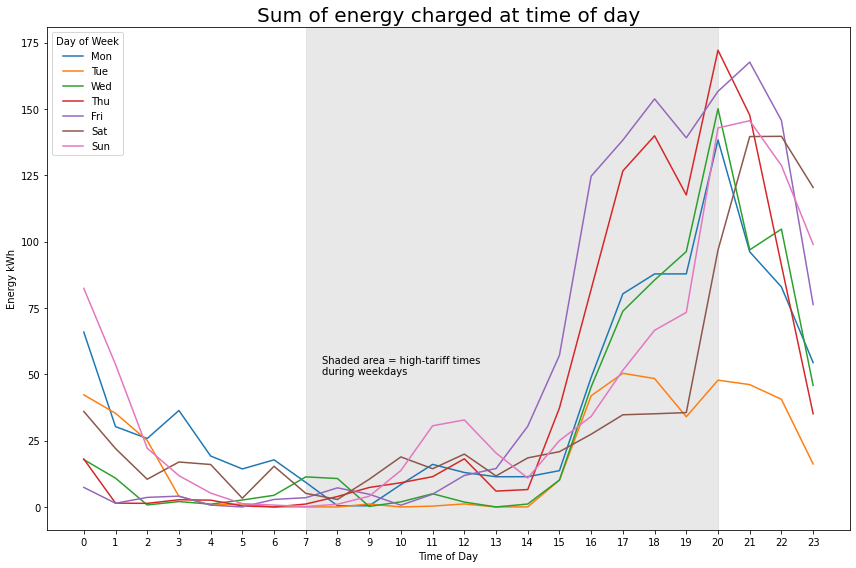

In [150]:
energy_details_hour_weekday_df = energy_details_day_hour_df.groupby(['Hour', 'Dayofweek_str'])['Energy'].sum().reset_index()

plt.xlabel('Time of Day')
plt.ylabel('Energy kWh')

hue_order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']

plt.legend(title='Day of Week')

ax = sns.lineplot(data=energy_details_hour_weekday_df, x="Hour", y ='Energy', hue = 'Dayofweek_str', hue_order = hue_order)

ax.legend_.set_title('Day of Week')

ax.set(xticks=range(0,24,1))

plt.axvspan(7,20, color='lightgrey', alpha = 0.5)

plt.text(7.5,50, 'Shaded area = high-tariff times \nduring weekdays')

plt.title('Sum of energy charged at time of day',size = 20)

plt.show()

### Explanation ###
Energy demand during a normal day is flat between 3am and 4pm.  Most of the charging commences at 4pm, reaches a peak about 8pm, and then decreases until it falls flat again by 3am.

The shaded area in the above graph represents the high-tariff times for electricity consumption during weekdays.   

In [151]:
energy_details_hour_deviceid_df = energy_details_df.groupby(['DeviceId','Hour'])['Energy'].sum().reset_index()

In [152]:
energy_details_hour_deviceid_df

,DeviceId,Hour,Energy
0,ZPR072245,0,47.065
1,ZPR072245,1,36.618
2,ZPR072245,2,9.925
3,ZPR072245,3,4.601
4,ZPR072245,4,3.764
...,...,...,...
64,ZPR081632,19,93.013
65,ZPR081632,20,99.229
66,ZPR081632,21,63.030
67,ZPR081632,22,66.754


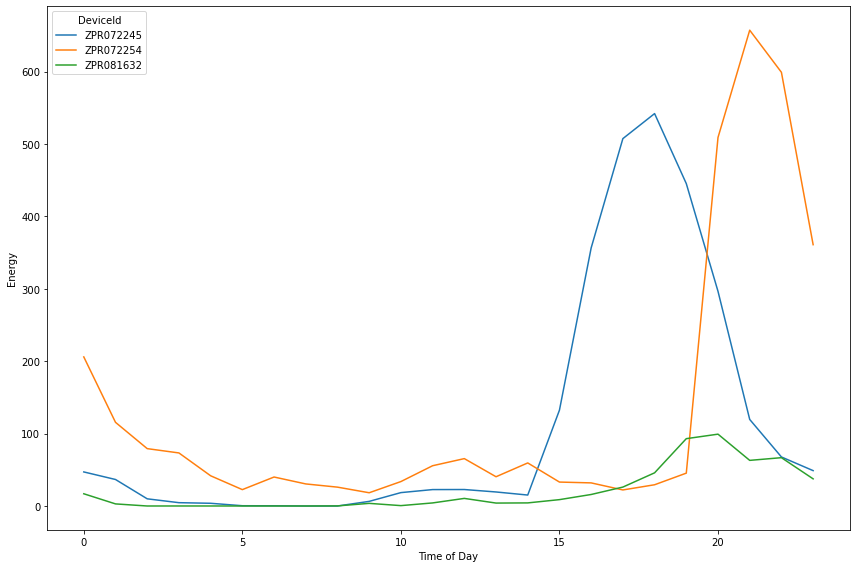

In [153]:
plt.xlabel('Time of Day')
ax = sns.lineplot(data = energy_details_hour_deviceid_df, x = 'Hour', y = 'Energy', hue = 'DeviceId')
plt.show()

In [154]:
energy_cumsum = energy_details_df.reset_index().set_index(['DeviceId', 'Timestamp'])

In [155]:
energy_cumsum = energy_cumsum.groupby(['DeviceId'])['Energy'].cumsum().reset_index()

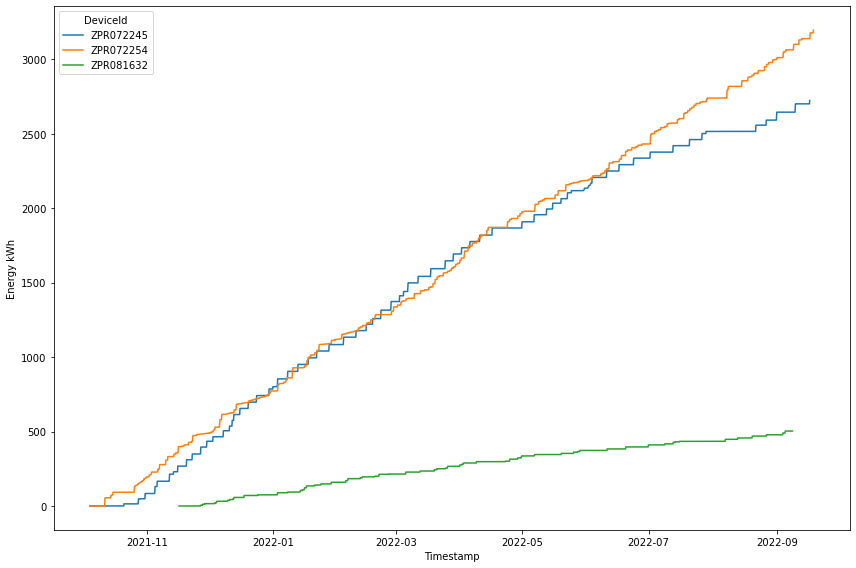

In [156]:
plt.ylabel('Energy kWh')
ax = sns.lineplot(data = energy_cumsum, x = 'Timestamp', y = 'Energy', hue = 'DeviceId')

# you can observe that the lenghts of the steps are different,
# which indicates that the number of sessions and the time between sessions is different

### Analysis of difference in charging sessions ###

The empirical cumulative distribution function (ECDF) is a method in inferential statistics and represents the proportion of observations falling below each unique value in a dataset.  We make use of an ECDF to visualize the difference in charging behaviour between the EV owners. 

Source:
https://seaborn.pydata.org/generated/seaborn.ecdfplot.html

**Analysis of charging session durations**

In [157]:
sessions_df.drop(sessions_df[sessions_df['SessionDurationMinutes'] > 3000].index).sort_values(by = 'SessionDurationMinutes', ascending = False)

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
f6808545-c954-414e-9aef-906b9a6bce29,ZPR072254,2022-06-25 13:19:08.040,2022-06-27 14:53:39.053,10.871,166,2974.0
62da6d7a-5870-45df-9734-a72db9db7aa0,ZPR081632,2022-02-20 16:59:52.600,2022-02-22 18:06:07.550,12.978,100,2946.0
0e95e8d2-8888-4b63-8697-bfbaab95d518,ZPR072254,2022-07-26 17:38:36.040,2022-07-28 18:14:10.373,2.794,88,2915.0
a0414c68-4ec4-43d2-976e-d3cc1ada326a,ZPR072254,2022-02-06 13:18:01.263,2022-02-08 11:10:06.410,5.360,114,2752.0
d5ddfb05-5a1c-46dc-82d3-af04c645037e,ZPR072254,2022-08-31 16:45:45.927,2022-09-02 14:26:10.960,12.255,88,2740.0
...,...,...,...,...,...,...
7288f4d2-3a06-4701-910b-c99940dd3153,ZPR072254,2021-12-19 09:18:40.367,2021-12-19 09:19:42.617,0.000,0,1.0
0f3224b1-af09-460e-ae73-08ff8aca2ede,ZPR072254,2021-10-25 12:44:48.630,2021-10-25 12:45:44.293,0.109,0,0.0
78518e52-ea7f-42d2-8969-7c116cb9cd22,ZPR081632,2022-07-05 07:32:43.953,2022-07-05 07:33:19.283,0.010,0,0.0


In [158]:
# Filter out the few very long session durations in order to be able to show a sensible ECDF plot
sessions_ECDFanalysis_df = sessions_df.drop(sessions_df[sessions_df['SessionDurationMinutes'] > 3000].index)
sessions_ECDFanalysis_df.sort_values(by = 'SessionDurationMinutes', ascending = False)

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
f6808545-c954-414e-9aef-906b9a6bce29,ZPR072254,2022-06-25 13:19:08.040,2022-06-27 14:53:39.053,10.871,166,2974.0
62da6d7a-5870-45df-9734-a72db9db7aa0,ZPR081632,2022-02-20 16:59:52.600,2022-02-22 18:06:07.550,12.978,100,2946.0
0e95e8d2-8888-4b63-8697-bfbaab95d518,ZPR072254,2022-07-26 17:38:36.040,2022-07-28 18:14:10.373,2.794,88,2915.0
a0414c68-4ec4-43d2-976e-d3cc1ada326a,ZPR072254,2022-02-06 13:18:01.263,2022-02-08 11:10:06.410,5.360,114,2752.0
d5ddfb05-5a1c-46dc-82d3-af04c645037e,ZPR072254,2022-08-31 16:45:45.927,2022-09-02 14:26:10.960,12.255,88,2740.0
...,...,...,...,...,...,...
7288f4d2-3a06-4701-910b-c99940dd3153,ZPR072254,2021-12-19 09:18:40.367,2021-12-19 09:19:42.617,0.000,0,1.0
0f3224b1-af09-460e-ae73-08ff8aca2ede,ZPR072254,2021-10-25 12:44:48.630,2021-10-25 12:45:44.293,0.109,0,0.0
78518e52-ea7f-42d2-8969-7c116cb9cd22,ZPR081632,2022-07-05 07:32:43.953,2022-07-05 07:33:19.283,0.010,0,0.0


<AxesSubplot:xlabel='Proportion', ylabel='SessionDurationMinutes'>

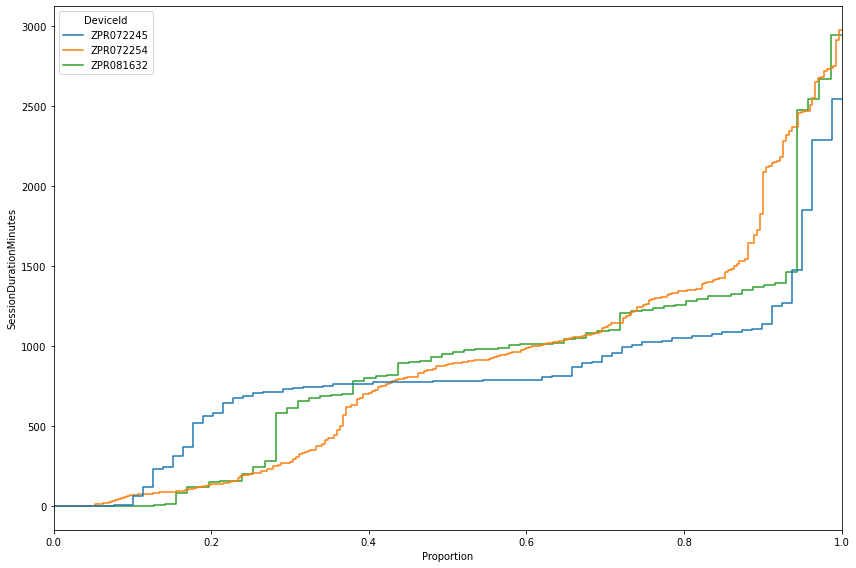

In [159]:
sns.ecdfplot (data = sessions_ECDFanalysis_df, y = "SessionDurationMinutes", hue = 'DeviceId')

### Explanation ###

One can observe that the distribution of charging session durations is quite different between the EV owners.   ZPR072254 (orange line) has a higher maximum of session durations, plus a more even distribution of durations.  ZPR072245 has a much lower maximum, plus the majority of sessions (about 40%) are about 750 minutes long (this seems to suggest a more common usage pattern by the EV owner).

**Analysis of energy charged per session**

In [160]:
sessions_ECDFanalysis_df = sessions_ECDFanalysis_df.drop(sessions_ECDFanalysis_df[sessions_ECDFanalysis_df['Energy'] < 1].index)

Text(0.5, 1.0, 'Cumulative distribution of charging sessions \nagainst amount of energy charged per session')

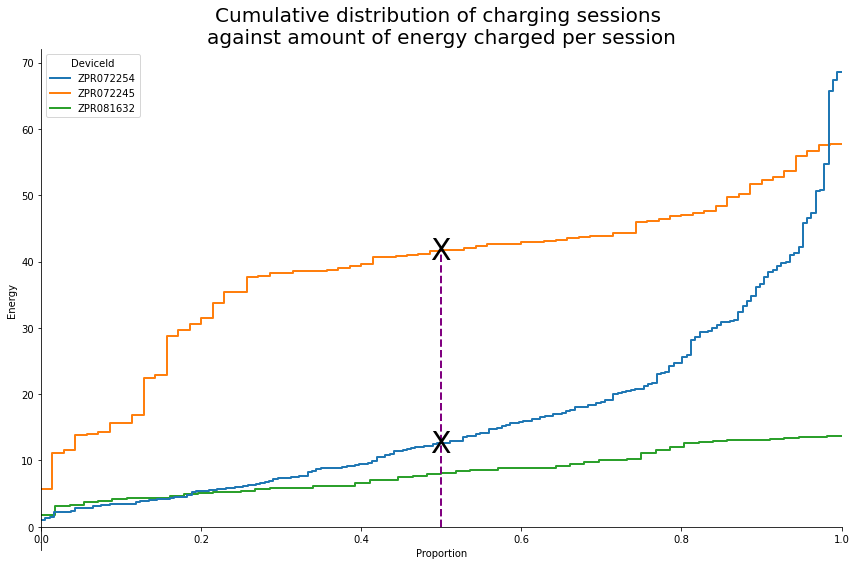

In [161]:
ax = sns.ecdfplot (data = sessions_ECDFanalysis_df, y = "Energy", hue = 'DeviceId', linewidth=2)
#plt.hlines(38, ls='--', xmin = 0, xmax = 0.905, color='purple', linewidth=2)
#plt.vlines(0.244, ls='--', ymin=0, ymax = 38, color='purple', linewidth=2)
#plt.vlines(0.905, ls='--', ymin=0, ymax = 38, color='purple', linewidth=2)
plt.vlines(0.5, ls='--', ymin=0, ymax = 41.9, color='purple', linewidth=2)
ax.spines['bottom'].set_position(('data',0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.text(0.49875,40.4,"X", horizontalalignment='center', size=30)
plt.text(0.49875,11.2,"X", horizontalalignment='center', size=30)
plt.title ('Cumulative distribution of charging sessions \nagainst amount of energy charged per session', size = 20)
#ax.spines['left'].set_visible(False)

### Explanation ###

This EV owners exhibit very different approaches to using and charging their EV.  While the orange and blue lines display EV owners that charge a similar total amount of energy during the observation time period, the characteristics of the charging sessions are very different.  One approach seems to be to only plug in the vehicle when energy is running low (ie charge higher amounts of energy), while another is to pug in the vehicle regularly even to only charge small amounts.

It cannot be determined with the given data whether an EV is parked in the garage but not attached to the cable;  this would require access to GPS location coordinates of the vehicle, which we do not have.

**How much time do EVs spent attached to the charging cable?**

In [162]:
# Calculate earliest session start time and latest session end time per device
earliest_session_start_times_df = sessions_df['StartDateTime'].groupby(sessions_df['DeviceId']).min().to_frame().reset_index()

In [163]:
earliest_session_start_times_df.set_index('DeviceId', inplace = True)

In [164]:
earliest_session_start_times_df

,StartDateTime
DeviceId,
ZPR072245,2021-10-04 09:45:33.467
ZPR072254,2021-10-04 09:59:59.130
ZPR081632,2021-11-16 10:24:10.670


In [165]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0
...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0


In [166]:
sessions_df.sort_values (by='EndDateTime')

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0
...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0


In [167]:
latest_session_start_times_df = sessions_df['EndDateTime'].groupby(sessions_df['DeviceId']).max().to_frame().reset_index()

In [168]:
latest_session_start_times_df.set_index('DeviceId', inplace = True)

In [169]:
latest_session_start_times_df

,EndDateTime
DeviceId,
ZPR072245,2022-09-16 16:59:34.750
ZPR072254,2022-09-18 12:33:56.610
ZPR081632,2022-09-08 10:08:53.230


In [170]:
total_lifetime_hours_df = earliest_session_start_times_df.join(latest_session_start_times_df)

In [171]:
total_lifetime_hours_df['TotalLifetimeHours'] = (total_lifetime_hours_df['EndDateTime'] - total_lifetime_hours_df['StartDateTime']).astype('timedelta64[h]')

In [172]:
total_lifetime_hours_df

,StartDateTime,EndDateTime,TotalLifetimeHours
DeviceId,,,
ZPR072245,2021-10-04 09:45:33.467,2022-09-16 16:59:34.750,8335.0
ZPR072254,2021-10-04 09:59:59.130,2022-09-18 12:33:56.610,8378.0
ZPR081632,2021-11-16 10:24:10.670,2022-09-08 10:08:53.230,7103.0


In [173]:
total_session_hours_df = sessions_df['SessionDurationMinutes'].groupby(sessions_df['DeviceId']).sum().to_frame().reset_index()
total_session_hours_df.set_index('DeviceId', inplace = True)
total_session_hours_df['TotalSessionDurationHours'] = round(total_session_hours_df['SessionDurationMinutes']/60)
total_session_hours_df

,SessionDurationMinutes,TotalSessionDurationHours
DeviceId,,
ZPR072245,68446.0,1141.0
ZPR072254,276441.0,4607.0
ZPR081632,87461.0,1458.0


In [174]:
total_lifetime_hours_df = total_lifetime_hours_df.join(total_session_hours_df)
total_lifetime_hours_df

,StartDateTime,EndDateTime,TotalLifetimeHours,SessionDurationMinutes,TotalSessionDurationHours
DeviceId,,,,,
ZPR072245,2021-10-04 09:45:33.467,2022-09-16 16:59:34.750,8335.0,68446.0,1141.0
ZPR072254,2021-10-04 09:59:59.130,2022-09-18 12:33:56.610,8378.0,276441.0,4607.0
ZPR081632,2021-11-16 10:24:10.670,2022-09-08 10:08:53.230,7103.0,87461.0,1458.0


In [175]:
total_lifetime_hours_df['PercentTimeCableAttached'] = total_lifetime_hours_df['TotalSessionDurationHours'] / total_lifetime_hours_df['TotalLifetimeHours']

In [176]:
total_lifetime_hours_df

,StartDateTime,EndDateTime,TotalLifetimeHours,SessionDurationMinutes,TotalSessionDurationHours,PercentTimeCableAttached
DeviceId,,,,,,
ZPR072245,2021-10-04 09:45:33.467,2022-09-16 16:59:34.750,8335.0,68446.0,1141.0,0.136893
ZPR072254,2021-10-04 09:59:59.130,2022-09-18 12:33:56.610,8378.0,276441.0,4607.0,0.549893
ZPR081632,2021-11-16 10:24:10.670,2022-09-08 10:08:53.230,7103.0,87461.0,1458.0,0.205265


<AxesSubplot:xlabel='TotalLifetimeHours', ylabel='TotalSessionDurationHours'>

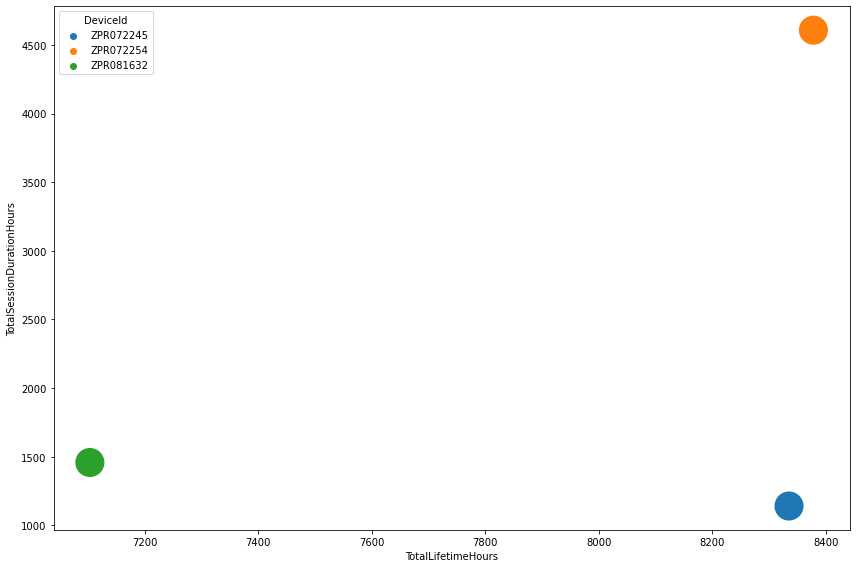

In [177]:
sns.scatterplot(data = total_lifetime_hours_df, x = 'TotalLifetimeHours', y = 'TotalSessionDurationHours', hue = 'DeviceId', s=1000)

### Explanation ###

The total amount of time that cars spent attached to the cable differs substantially.  While one EV has spent over half the time attached to the cable, for the other EVs this is substantially less.

In general terms, it is considered better for battery longevity to be connected to power.  When connected to a power source, most EVs actively manage the condition of the battery, such as temperature, or recycle the charge-level to protect the battery (ie repeat charge-discharge cycles).  In addition, multiple charging sessions with smaller increments of energy charged is considered advantageous for battery longevity over fewer charging sessions with larger amounts of energy charged.

In [178]:
# Clean up
del (earliest_session_start_times_df,
latest_session_start_times_df,
total_lifetime_hours_df,
total_session_hours_df)

### Correlation between time since last session and energy charged ###
**How much time passes between sessions, and how does this correlate with amount of energy charged?**

In [179]:
sessions_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes
SessionID,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0
...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0


In [180]:
sessions_cor_df = sessions_df.sort_values(by='EndDateTime', ascending=True)

In [181]:
sessions_cor_df['EndDateTimeOfPreviousSession'] = sessions_cor_df.groupby('DeviceId')['EndDateTime'].shift()

In [182]:
sessions_cor_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes,EndDateTimeOfPreviousSession
SessionID,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0,NaT
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0,2021-10-04 09:46:42.610
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0,2021-10-04 09:50:10.007
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0,NaT
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0,2021-10-04 09:55:15.450
...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0,2022-09-11 16:32:06.917
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0,2022-09-12 17:45:14.890
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0,2022-09-10 08:26:33.823


In [183]:
sessions_cor_df['MinutesSincePreviousSession'] = (sessions_cor_df['StartDateTime'] - sessions_cor_df['EndDateTimeOfPreviousSession']).astype('timedelta64[m]')

In [184]:
sessions_cor_df = sessions_cor_df.dropna()

In [185]:
sessions_cor_df = sessions_cor_df[sessions_cor_df['Energy']>1]

In [186]:
sessions_cor_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes,EndDateTimeOfPreviousSession,MinutesSincePreviousSession
SessionID,,,,,,,,
1bcd5631-f051-4c5d-a7a3-248b9690e0dd,ZPR072254,2021-10-11 11:55:16.560,2021-10-12 06:57:20.823,54.770,44,1142.0,2021-10-11 11:53:05.430,2.0
25de85c8-5e8f-4ed1-bec8-8b2e8fb2d075,ZPR072254,2021-10-14 08:16:40.090,2021-10-14 13:26:21.410,11.645,0,309.0,2021-10-12 06:57:20.823,2959.0
d4dcf3a5-74ec-4b4d-a705-e387980b5b92,ZPR072254,2021-10-14 14:10:45.270,2021-10-15 07:45:03.717,7.478,44,1054.0,2021-10-14 13:26:21.410,44.0
290a2ac0-6c5a-4b6a-87c7-d04f277933da,ZPR072254,2021-10-15 07:58:55.797,2021-10-15 13:38:52.120,18.097,0,339.0,2021-10-15 07:58:46.953,0.0
fc17fbb0-51e3-4b5a-a1e2-e9479d35aa34,ZPR072245,2021-10-20 18:59:09.693,2021-10-21 06:47:48.990,13.788,43,708.0,2021-10-20 16:04:56.040,174.0
...,...,...,...,...,...,...,...,...
bcabeddc-6a48-4a10-b80b-6559f8f893d2,ZPR072254,2022-09-11 10:44:56.133,2022-09-11 16:32:06.917,30.361,23,347.0,2022-09-09 09:49:25.760,2935.0
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0,2022-09-12 17:45:14.890,31.0
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0,2022-09-10 08:26:33.823,9033.0


Text(0.5, 1.0, 'Corelation of amount of energy charged and \ntime passed since last charging session')

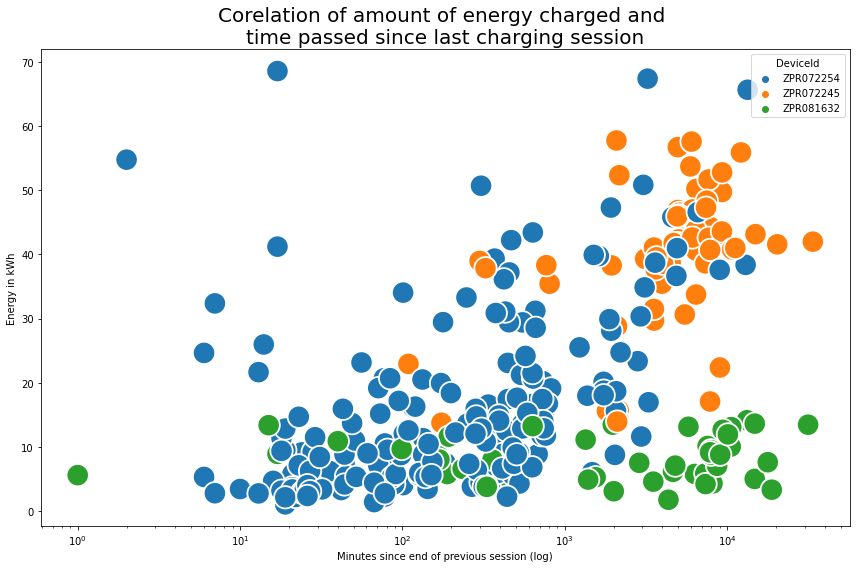

In [187]:
splot = sns.scatterplot(data = sessions_cor_df, x = 'MinutesSincePreviousSession', y = 'Energy', hue = 'DeviceId', s=500)
splot.set(xscale = "log")
splot.set_ylabel ('Energy in kWh')
splot.set_xlabel ('Minutes since end of previous session (log)')
splot.set_title ('Corelation of amount of energy charged and \ntime passed since last charging session', size = 20)

### Explanation ###
This chart shows how the charging behaviour differs in terms of how much time passes between charging sessions — resulting clustering can be observed quite neatly. Note that the total sum of energy charged at the wallboxes represented by the blue and the orange dots is almost identical (about 2500 kWh), however the charging behaviour is markedly different. The sessions at the wallbox represented by the orange dots are not only used to charge more energy (as we already saw in figure 2), but also substantially more time passes on average between sessions than with the blue dots sessions.

## Question 2: What cost savings could EV owners achieve without changing their vehicle usage pattern? ##

For EV owners, it would be of interest to understand how much of their high-tarif charging could be shifted to low-tarif periods without requiring a change in their general driving or charging habits, or altering the availability of their vehicle.

First, we determine how much energy could theoretically have been charged during low-tarif period during the charging session.  Then we compare this with how much energy was actually charged in the session during low-tarif period.

### Analyse ###

In [188]:
sessions_LT_df = sessions_df.reset_index().merge(KW_Charge_Max_df, how = 'left', on = 'DeviceId')

In [189]:
sessions_LT_df

,SessionID,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes,KW_Charger_Max
0,a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0,11.4
1,d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0,11.4
2,5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0,11.4
3,4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0,11.4
4,e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0,11.4
...,...,...,...,...,...,...,...,...
428,9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0,11.4
429,1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0,11.4
430,1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0,11.4
431,186f2a5f-fef5-4cf9-a578-139e6c21167d,ZPR072254,2022-09-16 18:21:54.183,2022-09-17 05:28:02.773,38.728,38,666.0,11.4


In [190]:
sessions_LT_df['LT_max_energy'] = sessions_LT_df['LT15minCountInPeriod'] * sessions_LT_df['KW_Charger_Max'] / 4

In [191]:
sessions_LT_df.set_index('SessionID', inplace=True)

In [192]:
sessions_LT_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes,KW_Charger_Max,LT_max_energy
SessionID,,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0,11.4,0.00
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0,11.4,0.00
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0,11.4,0.00
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0,11.4,0.00
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0,11.4,0.00
...,...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0,11.4,0.00
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0,11.4,242.25
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0,11.4,0.00


In [193]:
# Then, we use the detailed charging information in order to determine how much low-tarif and high-tarif
# charging was actually performed during a given session.

In [194]:
energy_details_df

Energy  \
SessionID                            DeviceId            
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245   0.000   
                                     ZPR072245   0.000   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245   0.000   
                                     ZPR072245   0.000   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245   0.000   
...                                                ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254   2.141   
                                     ZPR072254   2.137   
                                     ZPR072254   2.138   
                                     ZPR072254   2.138   
                                     ZPR072254   0.554   

                                                                      Timestamp  \
SessionID                            DeviceId                                     
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245 2021-10-04 09:45:30.596000+00:00   
                                     ZPR072245 2021-10-04 09:46:42.536000+00:00   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245 2021-10-04 09:49:08.904000+00:00   
                                     ZPR072245 2021-10-04 09:50:09.930000+00:00   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245 2021-10-04 09:53:42.364000+00:00   
...                                                                         ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254 2022-09-18 11:45:00.178000+00:00   
                                     ZPR072254 2022-09-18 12:00:00.055000+00:00   
                                     ZPR072254 2022-09-18 12:15:00.996000+00:00   
                                     ZPR072254 2022-09-18 12:30:00.474000+00:00   
                                     ZPR072254 2022-09-18 12:33:56.594000+00:00   

                                                Hour  Minute  Second  \
SessionID                            DeviceId                          
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245     9      45      30   
                                     ZPR072245     9      46      42   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245     9      49       8   
                                     ZPR072245     9      50       9   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245     9      53      42   
...                                              ...     ...     ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254    11      45       0   
                                     ZPR072254    12       0       0   
                                     ZPR072254    12      15       0   
                                     ZPR072254    12      30       0   
                                     ZPR072254    12      33      56   

                                                Microsecond  Year  Month  Day  \
SessionID                            DeviceId                                   
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245       596000  2021     10    4   
                                     ZPR072245       536000  2021     10    4   
d1b1ebff-6e4a-4593-86fe-6256eb8c2815 ZPR072245       904000  2021     10    4   
                                     ZPR072245       930000  2021     10    4   
5076b893-cfe3-4b18-bf08-5300448e6716 ZPR072245       364000  2021     10    4   
...                                                     ...   ...    ...  ...   
560f32fb-aec0-43a0-88db-9171dc7667b9 ZPR072254       178000  2022      9   18   
                                     ZPR072254        55000  2022      9   18   
                                     ZPR072254       996000  2022      9   18   
                                     ZPR072254       474000  2022      9   18   
                                     ZPR072254       594000  2022      9   18   

                                                Dayofweek HighTarif_LowTarif  
SessionID                            DeviceId                                 
a4802b64-7314-4c74-bcac-5ef9badfd05c ZPR072245          0       

In [195]:
energy_details_LT_df = energy_details_df[energy_details_df['HighTarif_LowTarif'] == 'LT']

In [196]:
energy_details_LT_df = energy_details_LT_df['Energy'].groupby(level = 0).sum().to_frame().reset_index()

In [197]:
energy_details_LT_df.rename({'Energy':'Actual_energy_charged_LT_kWh'}, axis=1, inplace=True)

In [198]:
energy_details_LT_df['Actual_energy_charged_LT_kWh'] = energy_details_LT_df['Actual_energy_charged_LT_kWh'].fillna(0)

In [199]:
sessions_LT_df = sessions_LT_df.fillna(0)

In [200]:
assert energy_details_LT_df['Actual_energy_charged_LT_kWh'].isna().sum() == 0

In [201]:
energy_details_LT_df.set_index('SessionID', inplace=True)

In [202]:
sessions_LT_df = sessions_LT_df.join (energy_details_LT_df)

In [203]:
sessions_LT_df['LT_max_charge_potential_kWH'] = sessions_LT_df[['LT_max_energy', 'Energy']].min(axis=1)

In [204]:
sessions_LT_df['HT_to_LT_switch_potential_kWh'] = (sessions_LT_df['LT_max_charge_potential_kWH'] - sessions_LT_df['Actual_energy_charged_LT_kWh']).round(2)

In [205]:
sessions_LT_df

,DeviceId,StartDateTime,EndDateTime,Energy,LT15minCountInPeriod,SessionDurationMinutes,KW_Charger_Max,LT_max_energy,Actual_energy_charged_LT_kWh,LT_max_charge_potential_kWH,HT_to_LT_switch_potential_kWh
SessionID,,,,,,,,,,,
a4802b64-7314-4c74-bcac-5ef9badfd05c,ZPR072245,2021-10-04 09:45:33.467,2021-10-04 09:46:42.610,0.000,0,1.0,11.4,0.00,NaN,0.000,NaN
d1b1ebff-6e4a-4593-86fe-6256eb8c2815,ZPR072245,2021-10-04 09:49:09.793,2021-10-04 09:50:10.007,0.000,0,1.0,11.4,0.00,NaN,0.000,NaN
5076b893-cfe3-4b18-bf08-5300448e6716,ZPR072245,2021-10-04 09:53:43.023,2021-10-04 09:55:15.450,0.000,0,1.0,11.4,0.00,NaN,0.000,NaN
4ffa3a72-42d7-4898-b39a-9b815dc52505,ZPR072254,2021-10-04 09:59:59.130,2021-10-04 10:01:32.343,0.000,0,1.0,11.4,0.00,NaN,0.000,NaN
e724a071-b454-4dd6-af48-e691f4da3b82,ZPR072245,2021-10-04 19:51:41.727,2021-10-04 19:53:00.120,0.178,0,1.0,11.4,0.00,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9daf8621-97d7-4535-8a6e-57cd856d48d5,ZPR072254,2022-09-12 17:31:57.963,2022-09-12 17:45:14.890,0.000,0,13.0,11.4,0.00,NaN,0.000,NaN
1618ab91-26a8-403c-bcb6-06394a2b1a87,ZPR072254,2022-09-12 18:16:35.940,2022-09-14 06:15:03.080,8.445,85,2158.0,11.4,242.25,8.445,8.445,0.00
1b2e9bb4-6978-41c5-a13e-09ffccf58f83,ZPR072245,2022-09-16 14:59:56.457,2022-09-16 16:59:34.750,22.395,0,119.0,11.4,0.00,NaN,0.000,NaN


In [206]:
sessions_LT_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, a4802b64-7314-4c74-bcac-5ef9badfd05c to 560f32fb-aec0-43a0-88db-9171dc7667b9
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DeviceId                       433 non-null    object        
 1   StartDateTime                  433 non-null    datetime64[ns]
 2   EndDateTime                    433 non-null    datetime64[ns]
 3   Energy                         433 non-null    float64       
 4   LT15minCountInPeriod           433 non-null    int64         
 5   SessionDurationMinutes         433 non-null    float64       
 6   KW_Charger_Max                 433 non-null    float64       
 7   LT_max_energy                  433 non-null    float64       
 8   Actual_energy_charged_LT_kWh   316 non-null    float64       
 9   LT_max_charge_potential_kWH    433 non-null    float64       
 10  HT_to_LT_switch_potenti

In [207]:
sessions_LT_df['Session_Year'] = pd.DatetimeIndex(sessions_LT_df['StartDateTime']).year

In [208]:
HT_to_LT_potential_df = sessions_LT_df.groupby(by=['DeviceId','Session_Year'])['HT_to_LT_switch_potential_kWh'].sum().to_frame()

In [209]:
HT_to_LT_potential_df

HT_to_LT_switch_potential_kWh
DeviceId  Session_Year                               
ZPR072245 2021                                 415.44
          2022                                1051.21
ZPR072254 2021                                 116.45
          2022                                  70.05
ZPR081632 2021                                  17.98
          2022                                  61.99

In [210]:
HT_to_LT_potential_df.reset_index(inplace=True)

In [211]:
HT_to_LT_potential_df

,DeviceId,Session_Year,HT_to_LT_switch_potential_kWh
0,ZPR072245,2021,415.44
1,ZPR072245,2022,1051.21
2,ZPR072254,2021,116.45
3,ZPR072254,2022,70.05
4,ZPR081632,2021,17.98
5,ZPR081632,2022,61.99


In [212]:
# Calculate value per calendar year

for t in tariffs:
    HT_LT_diff = tariffs[t]['HT'] - tariffs[t]['LT']
    HT_to_LT_potential_df.loc[HT_to_LT_potential_df['Session_Year'] == t, 'Cost_savings_potential_CHF'] = \
      (HT_to_LT_potential_df['HT_to_LT_switch_potential_kWh'] * HT_LT_diff).round(2)

In [213]:
HT_to_LT_potential_df

,DeviceId,Session_Year,HT_to_LT_switch_potential_kWh,Cost_savings_potential_CHF
0,ZPR072245,2021,415.44,22.85
1,ZPR072245,2022,1051.21,57.82
2,ZPR072254,2021,116.45,6.40
3,ZPR072254,2022,70.05,3.85
4,ZPR081632,2021,17.98,0.99
5,ZPR081632,2022,61.99,3.41


In [214]:
HT_to_LT_total_df = HT_to_LT_potential_df.groupby('DeviceId')['Cost_savings_potential_CHF'].sum().reset_index()
HT_to_LT_total_df

,DeviceId,Cost_savings_potential_CHF
0,ZPR072245,80.67
1,ZPR072254,10.25
2,ZPR081632,4.40


### Visualize ###

Text(0.5, 1.0, 'Cost savings potential from switching high-tariff charging to low-tariff')

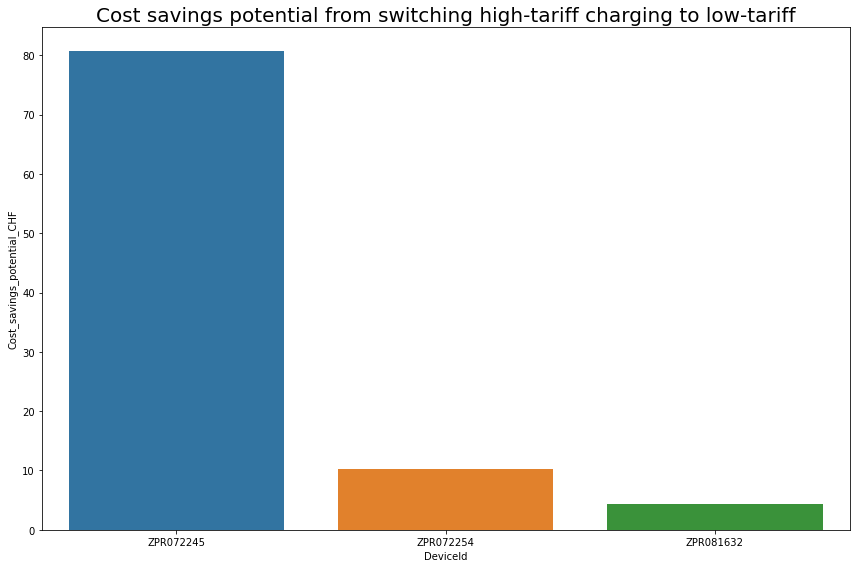

In [215]:
sns.barplot (data = HT_to_LT_total_df.sort_values(by='Cost_savings_potential_CHF', ascending = False), x ='DeviceId', y ='Cost_savings_potential_CHF').set_title('Cost savings potential from switching high-tariff charging to low-tariff', fontsize = 20)

### Explanation ###

While cost savings per charging station are not substantial, they require virtually no change in vehicle usage behaviour and hence are straightforward for EV owners to achieve.  Also, as of writing in September 2022, cost increases for electricity starting in 2023 will make cost savings more interesting.

## Question 3: Can we forecast hourly energy demand from historical charging data and meteorological data? ##
In the following, we visualize the energy demand values predicted by the model and compare with the actual energy values from the test split.

### Analyze ###

In [216]:
# Fit a new model to the training data
gbr_model = GradientBoostingRegressor(random_state=42).fit(X.iloc[train_0], y.iloc[train_0])

In [217]:
# Create prediction values against the test data
gbr_predictions = gbr_model.predict(X.iloc[test_0])

In [218]:
# Prepare the dataframe that maps actual vs predicted energy demand against weekdays
gbr_pred_df = pd.DataFrame(gbr_predictions)
gbr_pred_df.columns=['pred']
plot_weekday = pd.concat([X.iloc[test_0].reset_index(), y.iloc[test_0].reset_index(), gbr_pred_df], axis = 1)

In [219]:
plot_weekday

,index,Year,Month,Hour,Dayofweek,RainDurationInMinutes,AverageTemperatureInC,HighTariff,LowTariff,index,Energy,pred
0,2291,1,2,3,6,0.08,5.73,False,True,2291,0.000000,-0.001007
1,2292,1,2,4,6,13.13,6.04,False,True,2292,0.000000,-0.007161
2,2293,1,2,5,6,7.05,6.11,False,True,2293,0.000000,-0.019852
3,2294,1,2,6,6,0.22,6.06,False,True,2294,0.000000,-0.024847
4,2295,1,2,7,6,0.10,6.00,False,True,2295,0.000000,0.079097
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3286,1,4,14,5,3.22,1.25,False,True,3286,0.035298,0.009556
996,3287,1,4,15,5,30.03,1.36,False,True,3287,0.195059,0.012646
997,3288,1,4,16,5,46.35,1.44,False,True,3288,0.190391,0.023845
998,3289,1,4,17,5,55.62,0.89,False,True,3289,0.000000,0.156407


In [220]:
plot_weekday = plot_weekday[['Dayofweek', 'Hour', 'Energy', 'pred']]

In [221]:
plot_weekday = plot_weekday.groupby(by=['Dayofweek', 'Hour']).sum()

In [222]:
plot_weekday

Energy      pred
Dayofweek Hour                    
0         0     0.328858  0.905057
          1     0.000000  0.889987
          2     0.000000  0.861862
          3     0.033935  0.497383
          4     0.000000  0.300417
...                  ...       ...
6         19    0.777510  0.807733
          20    1.311759  0.902091
          21    2.210427  0.999554
          22    1.604322  1.843106
          23    0.560474  2.081644

[168 rows x 2 columns]

### Visualize ###

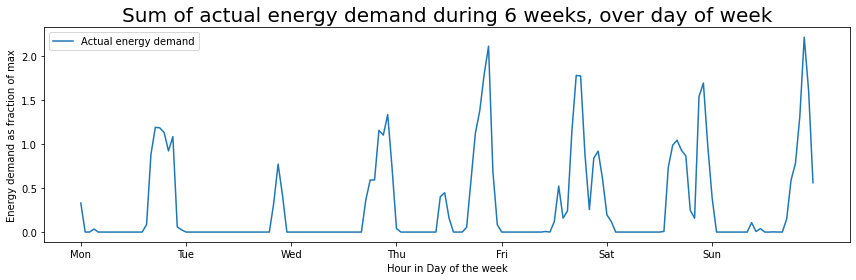

In [223]:
ax = plot_weekday['Energy'].plot(
    xlabel='Hour in Day of the week',
    ylabel='Energy demand as fraction of max',
    figsize = (12,4),
    xticks = range(0,168,24),
)
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.legend(['Actual energy demand', 'Predicted energy demand'])
ax.set (title="Sum of actual energy demand during 6 weeks, over day of week")
ax.title.set_size(20)

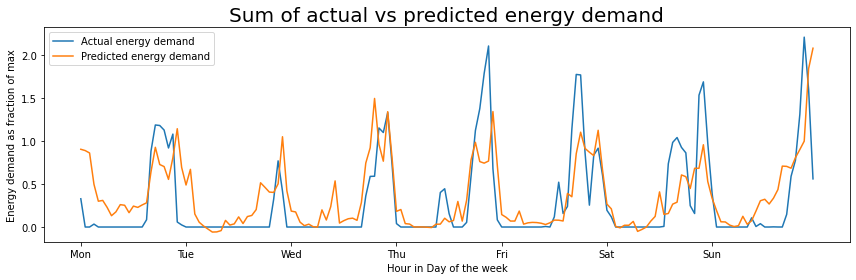

In [224]:
ax = plot_weekday.plot(
    xlabel='Hour in Day of the week',
    ylabel='Energy demand as fraction of max',
    figsize = (12,4),
    xticks = range(0,168,24),
    title = 'Sum of actual energy demand over 6 weeks vs predicted energy demand'
)
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.legend(['Actual energy demand', 'Predicted energy demand'])
ax.set (title="Sum of actual vs predicted energy demand")
ax.title.set_size(20)

### Explanation ###
From the above graph, we can see that the predicted model approximates the actual values from the test data set quite well.  This confirms that modelling results achieved in Section 4 above.